# Salmonella Newport USA population analysis

In [34]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from matplotlib.pyplot import figure
from wand.image import Image as WImage
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from PIL import Image
import io
pd.set_option('display.max_columns', 300)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import in the mlst data 

file1 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_newport/data/salmonellast_output.csv'
data1 = pd.read_csv(file1, header=0, na_values='Nothing')

In [3]:
# Check the first few observations

data1.head()

name     SCHEME    ST aroC dnaN hemD hisD purE sucA  \
0  SRR1425284_contigs.fasta  senterica    45   10    7   21   14   15   12   
1  SRR5760393_contigs.fasta  senterica  2930   16    2   45  744   36   39   
2  SRR5851178_contigs.fasta  senterica   118   16    2   45   43   36   39   
3  SRR5935662_contigs.fasta  senterica   118   16    2   45   43   36   39   
4  SRR6881504_contigs.fasta  senterica   118   16    2   45   43   36   39   

  thrA  
0   12  
1   42  
2   42  
3   42  
4   42

In [4]:
data1['ST'].value_counts()

118     800
45      643
5       529
132     192
31       42
       ... 
95        1
2129      1
1370      1
4190      1
2855      1
Name: ST, Length: 61, dtype: int64

In [5]:
# Split the name column into two to get the SRR ids separately

data1['id'] = data1['name'].str.split('_').str[0]

In [6]:
# Check data again

data1.head()

name     SCHEME    ST aroC dnaN hemD hisD purE sucA  \
0  SRR1425284_contigs.fasta  senterica    45   10    7   21   14   15   12   
1  SRR5760393_contigs.fasta  senterica  2930   16    2   45  744   36   39   
2  SRR5851178_contigs.fasta  senterica   118   16    2   45   43   36   39   
3  SRR5935662_contigs.fasta  senterica   118   16    2   45   43   36   39   
4  SRR6881504_contigs.fasta  senterica   118   16    2   45   43   36   39   

  thrA          id  
0   12  SRR1425284  
1   42  SRR5760393  
2   42  SRR5851178  
3   42  SRR5935662  
4   42  SRR6881504

In [7]:
# Check for NAs

data1.isnull().sum()

name      0
SCHEME    0
ST        0
aroC      0
dnaN      0
hemD      0
hisD      0
purE      0
sucA      0
thrA      0
id        0
dtype: int64

In [8]:
# Filter out undesirable columns

data2 = data1.drop(['name', 'SCHEME'], axis = 1)
data2.head()

ST aroC dnaN hemD hisD purE sucA thrA          id
0    45   10    7   21   14   15   12   12  SRR1425284
1  2930   16    2   45  744   36   39   42  SRR5760393
2   118   16    2   45   43   36   39   42  SRR5851178
3   118   16    2   45   43   36   39   42  SRR5935662
4   118   16    2   45   43   36   39   42  SRR6881504

In [9]:
# Importing the sistr output

file2 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_newport/data/sistr_output.csv'
data3 = pd.read_csv(file2, header=0, na_values='Nothing')

In [10]:
# Checking the first few observations

data3.head()

cgmlst_ST  cgmlst_distance cgmlst_genome_match  cgmlst_matching_alleles  \
0           NaN         0.009091        SAL_DA6272AA                      327   
1  1.297108e+09         0.003030        SAL_BA3042AA                      329   
2  2.799665e+08         0.006061          SRR1122516                      328   
3  4.017665e+09         0.060606        SAL_EA9357AA                      310   
4  2.221566e+09         0.006061        SAL_EA2811AA                      328   

  cgmlst_subspecies                                     fasta_filepath  \
0          enterica  /lustre/work/deogun/npavlovikj/FFH/pegasus-sal...   
1          enterica  /lustre/work/deogun/npavlovikj/FFH/pegasus-sal...   
2          enterica  /lustre/work/deogun/npavlovikj/FFH/pegasus-sal...   
3          enterica  /lustre/work/deogun/npavlovikj/FFH/pegasus-sal...   
4          enterica  /lustre/work/deogun/npavlovikj/FFH/pegasus-sal...   

                 name   h1   h2 o_antigen qc_messages qc_status serogroup  \
0  SRR1425284_contigs  e,h  1,2    6,8,20         NaN      PASS     C2-C3   
1  SRR5760393_contigs  e,h  1,2    6,8,20         NaN      PASS     C2-C3   
2  SRR5851178_contigs  e,h  1,2    6,8,20         NaN      PASS     C2-C3   
3  SRR5935662_contigs  e,h  1,2    6,8,20         NaN      PASS     C2-C3   
4  SRR6881504_contigs  e,h  1,2    6,8,20         NaN      PASS     C2-C3   

   serovar serovar_antigen serovar_cgmlst  
0  Newport   Bardo|Newport        Newport  
1  Newport   Bardo|Newport        Newport  
2  Newport   Bardo|Newport        Newport  
3  Newport   Bardo|Newport        Newport  
4  Newport   Bardo|Newport        Newport

In [11]:
# Checking for NAs

data3.isnull().sum()

cgmlst_ST                    76
cgmlst_distance               0
cgmlst_genome_match           0
cgmlst_matching_alleles       0
cgmlst_subspecies             2
fasta_filepath                0
name                          0
h1                            0
h2                            0
o_antigen                     0
qc_messages                2353
qc_status                     0
serogroup                     0
serovar                       0
serovar_antigen               0
serovar_cgmlst                0
dtype: int64

In [12]:
# Removing unneeded columns

list_of_cols = ['cgmlst_distance', 'cgmlst_genome_match', 'cgmlst_matching_alleles', 'cgmlst_subspecies', 'fasta_filepath',
               'h1', 'h2', 'o_antigen', 'qc_messages', 'serogroup']

data4 = data3.drop(columns = list_of_cols, axis = 1)
data4.head()

cgmlst_ST                name qc_status  serovar serovar_antigen  \
0           NaN  SRR1425284_contigs      PASS  Newport   Bardo|Newport   
1  1.297108e+09  SRR5760393_contigs      PASS  Newport   Bardo|Newport   
2  2.799665e+08  SRR5851178_contigs      PASS  Newport   Bardo|Newport   
3  4.017665e+09  SRR5935662_contigs      PASS  Newport   Bardo|Newport   
4  2.221566e+09  SRR6881504_contigs      PASS  Newport   Bardo|Newport   

  serovar_cgmlst  
0        Newport  
1        Newport  
2        Newport  
3        Newport  
4        Newport

In [13]:
# Split the name columnn to create the id column

data4['id'] = data4['name'].str.split('_').str[0]
data4 = data4.drop('name', axis = 1)
data4.head()

cgmlst_ST qc_status  serovar serovar_antigen serovar_cgmlst          id
0           NaN      PASS  Newport   Bardo|Newport        Newport  SRR1425284
1  1.297108e+09      PASS  Newport   Bardo|Newport        Newport  SRR5760393
2  2.799665e+08      PASS  Newport   Bardo|Newport        Newport  SRR5851178
3  4.017665e+09      PASS  Newport   Bardo|Newport        Newport  SRR5935662
4  2.221566e+09      PASS  Newport   Bardo|Newport        Newport  SRR6881504

In [14]:
# Import the baps data 

file3 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_newport/data/fastbaps_partition_baps_prior_l6.csv'
data5 = pd.read_csv(file3, header=0, na_values='Nothing')

In [15]:
# Check the first few observations

data5.head()

id  Baps_1  Baps_2  Baps_3  Baps_4  Baps_5  Baps_6
0  SRR1002805       8      21      44      67      99     134
1  SRR1002816       8      25      60     103     167     235
2  SRR1002817       1       1       1       1       1       1
3  SRR1002827       1       1       1       1       1       1
4  SRR1002828       1       1       1       1       1       1

In [16]:
list_of_genomes = ['SRR2182940', 'SRR2180221', 'SRR2125016', 'SRR2125008', 'SRR1693371', 'SRR1637077', 'SRR1612361', 'SRR1522096',
                   'SRR1269374', 'SRR1263414', 'SRR1158097', 'SRR1055762']
d = data5.set_index('id')
d1 = d.loc[list_of_genomes]

In [17]:
d1.shape

(12, 6)

In [18]:
d1

Baps_1  Baps_2  Baps_3  Baps_4  Baps_5  Baps_6
id                                                        
SRR2182940       8      22      48      75     113     153
SRR2180221       8      22      48      74     111     151
SRR2125016       8      22      49      78     119     160
SRR2125008       8      22      49      78     119     160
SRR1693371       8      22      47      73     108     148
SRR1637077       8      22      47      73     108     148
SRR1612361       8      22      48      76     115     156
SRR1522096       8      22      47      73     107     145
SRR1269374       8      22      48      75     113     153
SRR1263414       8      22      47      71     105     143
SRR1158097       8      22      48      74     110     150
SRR1055762       8      22      48      74     110     150

In [19]:
# Merge all datasets on id

data6 = pd.merge(data2, data4, on = 'id')
data7 = pd.merge(data5, data6, on = 'id')
data7.head()

id  Baps_1  Baps_2  Baps_3  Baps_4  Baps_5  Baps_6   ST aroC dnaN  \
0  SRR1002805       8      21      44      67      99     134  118   16    2   
1  SRR1002816       8      25      60     103     167     235  118   16    2   
2  SRR1002817       1       1       1       1       1       1   45   10    7   
3  SRR1002827       1       1       1       1       1       1   45   10    7   
4  SRR1002828       1       1       1       1       1       1   45   10    7   

  hemD hisD purE sucA thrA     cgmlst_ST qc_status  serovar serovar_antigen  \
0   45   43   36   39   42  1.089390e+09      PASS  Newport   Bardo|Newport   
1   45   43   36   39   42  1.837685e+06      PASS  Newport   Bardo|Newport   
2   21   14   15   12   12  1.468400e+09      PASS  Newport   Bardo|Newport   
3   21   14   15   12   12  1.468400e+09      PASS  Newport   Bardo|Newport   
4   21   14   15   12   12  1.468400e+09      PASS  Newport   Bardo|Newport   

  serovar_cgmlst  
0        Newport  
1        Newport  
2        Newport  
3        Newport  
4        Newport

In [20]:
# Check for missing values

data7.isnull().sum() 

id                  0
Baps_1              0
Baps_2              0
Baps_3              0
Baps_4              0
Baps_5              0
Baps_6              0
ST                  0
aroC                0
dnaN                0
hemD                0
hisD                0
purE                0
sucA                0
thrA                0
cgmlst_ST          76
qc_status           0
serovar             0
serovar_antigen     0
serovar_cgmlst      0
dtype: int64

In [21]:
srr_to_remove = data7.loc[(data7['qc_status'] != 'PASS')]
list(srr_to_remove['id'])

['SRR1033498',
 'SRR1175792',
 'SRR5195422',
 'SRR5341736',
 'SRR5711534',
 'SRR6359139',
 'SRR6371557',
 'SRR6627710',
 'SRR6879362',
 'SRR6880763',
 'SRR6881550',
 'SRR8782582']

In [22]:
# Replace hyphen with NA

data7 = data7.replace('-', np.nan)
data7.isnull().sum()

id                  0
Baps_1              0
Baps_2              0
Baps_3              0
Baps_4              0
Baps_5              0
Baps_6              0
ST                  4
aroC                2
dnaN                2
hemD                2
hisD                2
purE                2
sucA                2
thrA                2
cgmlst_ST          76
qc_status           0
serovar             0
serovar_antigen     0
serovar_cgmlst      0
dtype: int64

In [23]:
# Replace interrogation characters with NA

data7 = data7.replace('?', np.nan)
data7.isnull().sum()

id                  0
Baps_1              0
Baps_2              0
Baps_3              0
Baps_4              0
Baps_5              0
Baps_6              0
ST                  4
aroC                2
dnaN                2
hemD                2
hisD                2
purE                2
sucA                2
thrA                2
cgmlst_ST          76
qc_status           0
serovar             0
serovar_antigen     0
serovar_cgmlst      0
dtype: int64

In [24]:
print('There are 76 missing values (rows) for cgmlst_ST!')
print('We need to remove this rows before plotting the distribution of cgmlst_st lineages.')

There are 76 missing values (rows) for cgmlst_ST!
We need to remove this rows before plotting the distribution of cgmlst_st lineages.


# Don't remove all rows with NAs because that will affect the calculations for the variables for which you have data.
# The best approach is to removed rows with NAs for the particular column you are plotting.
# In other words, with this kind of data, it is typically a bad idea to blindly removed all NAs 

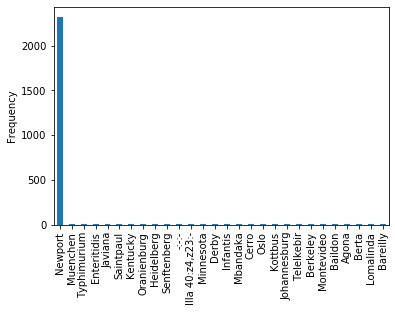

In [25]:
# Plot the counts of serovars to check for erroneous calls 

_ = data7['serovar'].value_counts().plot(kind = 'bar')
_ = plt.ylabel('Frequency')
plt.show()

In [26]:
# getting the shape of the data

data7.shape

(2365, 20)

In [33]:
# getting the counts of correctly classified genomes

data7['serovar_antigen'].value_counts()

Bardo|Newport                                                                           2317
Muenchen|Virginia                                                                          6
Typhimurium                                                                                5
Blegdam|Dublin|Enteritidis|Gueuletapee|Hillingdon|Kiel|Moscow|Naestved|Nitra|Rostock       4
Saintpaul                                                                                  3
Kentucky                                                                                   2
Agona|Budapest|Derby                                                                       2
Haelsingborg|Moers|Oranienburg|Othmarschen                                                 2
Baildon|Lomalinda                                                                          2
Heidelberg                                                                                 2
Senftenberg                                                           

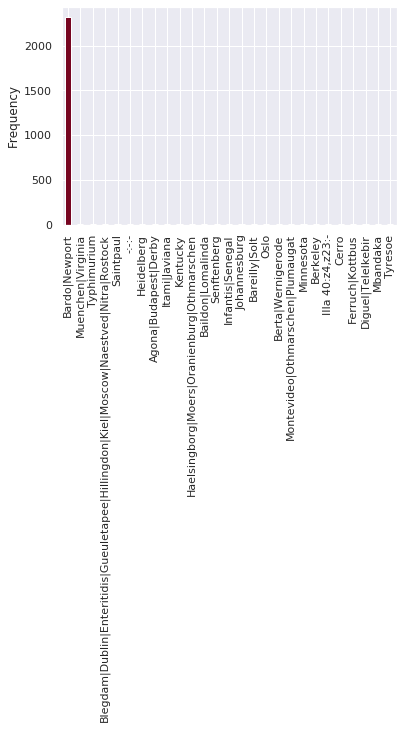

In [96]:
# Plot the counts of serovars to check for erroneous calls 

_ = data7['serovar_antigen'].value_counts().plot(kind = 'bar')
_ = plt.ylabel('Frequency')
plt.show()

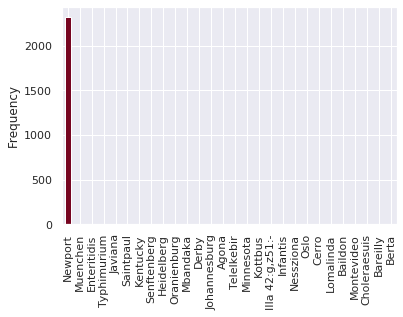

In [97]:
# Plot the counts of serovars to check for erroneous calls 

_ = data7['serovar_cgmlst'].value_counts().plot(kind = 'bar')
_ = plt.ylabel('Frequency')
plt.show()

In [98]:
# Checking genomes that passed or not qc_status of SISTR

data7['qc_status'].value_counts()

PASS       2353
WARNING      10
FAIL          2
Name: qc_status, dtype: int64

# I am not filtering out only the genomes that passed the qc_status from SISTR

In [99]:
#data7 = data7[data7['qc_status'] == 'PASS']

In [100]:
# Check the data

data7['qc_status'].value_counts()

PASS       2353
WARNING      10
FAIL          2
Name: qc_status, dtype: int64

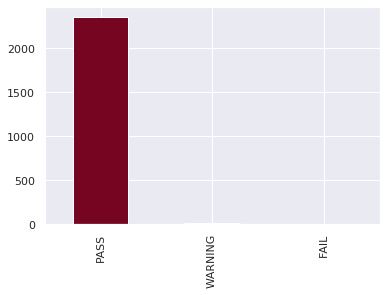

In [101]:
# Plot it

data7['qc_status'].value_counts().plot(kind = 'bar')

# Supplementary figure 1 - Erroneous calls by SISTR

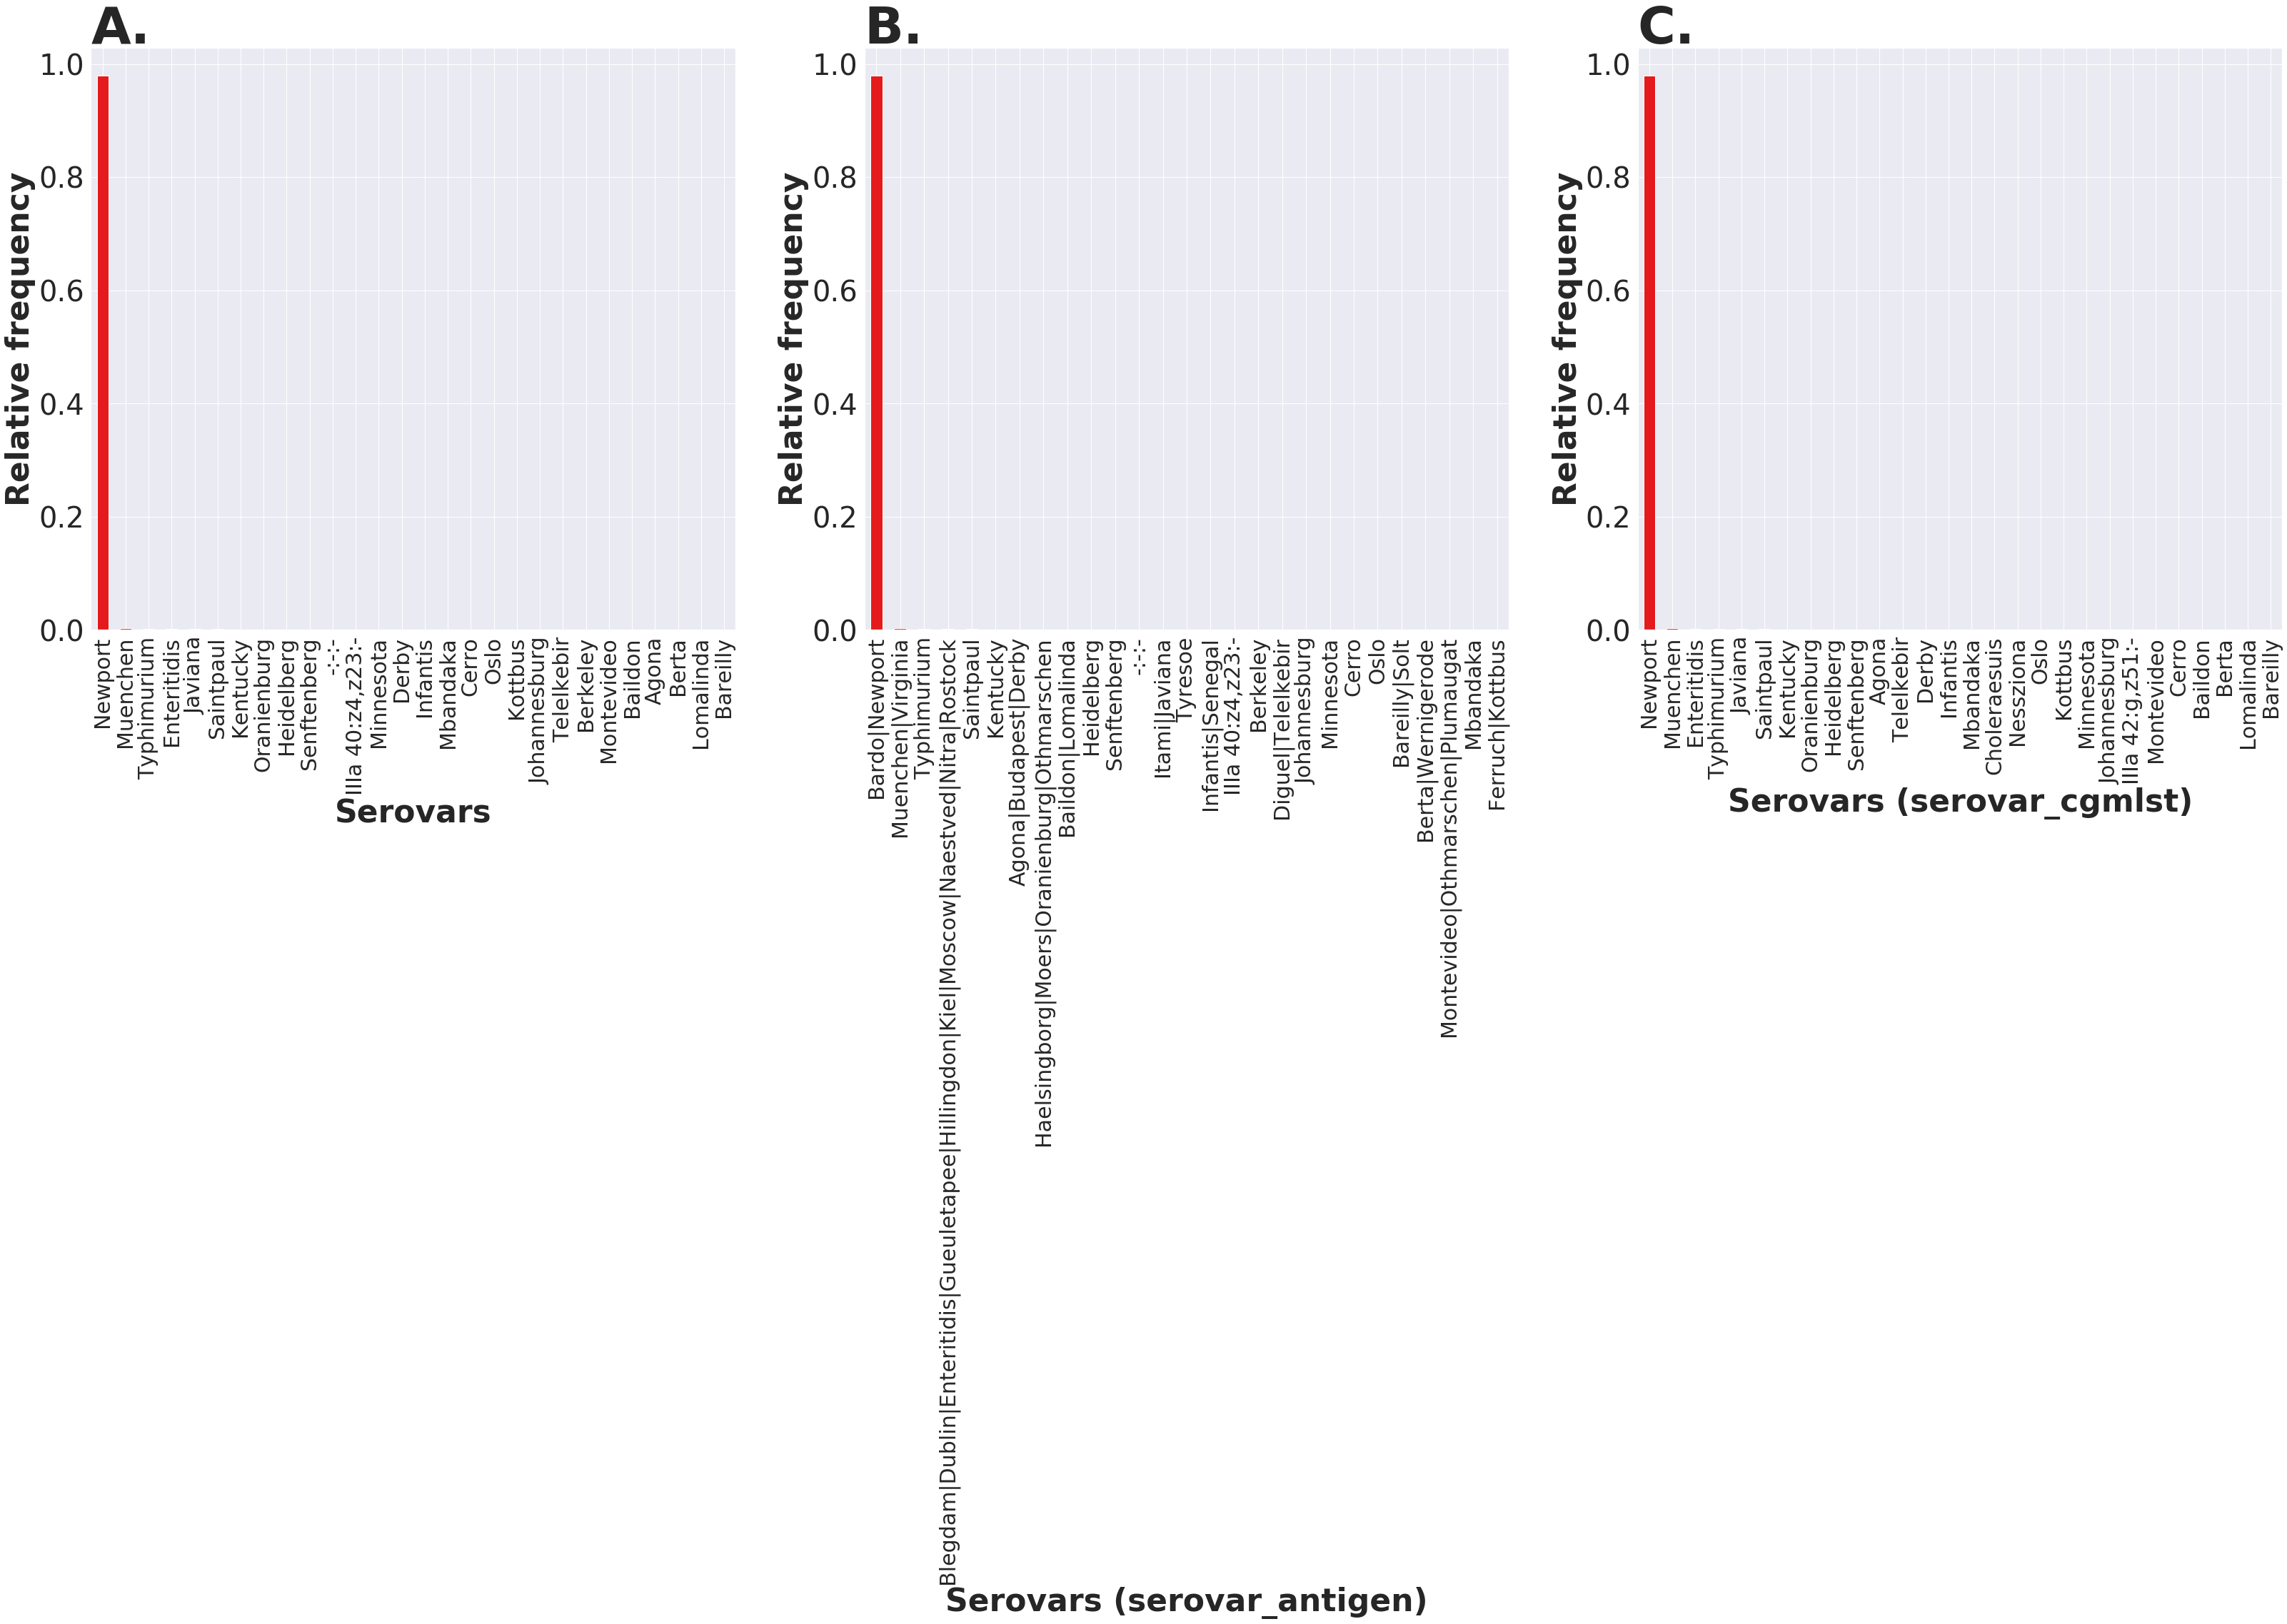

In [55]:
# Set background and number of subplots 

_ = sns.set(style="darkgrid")
fig, ax = plt.subplots(1, 3, figsize=(55, 15))

# Remove default tick marks and labels 

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

# Plot A - checking the serovar column

ax1 = fig.add_subplot(1, 3, 1)
_ = sns.set_palette('Set1', 40)
_ = data7['serovar'].value_counts(normalize = True, ascending = False).plot(kind = 'bar')
_ = plt.xlabel('Serovars', fontsize = 44, weight = 'bold')
_ = plt.ylabel('Relative frequency', fontsize = 44, weight = 'bold')
_ = plt.tick_params(axis = 'x', which = 'major', labelsize = 30, labelrotation = 90)
_ = plt.tick_params(axis = 'y', which = 'major', labelsize = 40)
_ = plt.title('A.', fontsize = 72, weight = 'bold', loc = 'left')

# Plot B - checking the serovar column

ax2 = fig.add_subplot(1, 3, 2)
_ = sns.set_palette('Set1', 40)
_ = data7['serovar_antigen'].value_counts(normalize = True, ascending = False).plot(kind = 'bar')
_ = plt.xlabel('Serovars (serovar_antigen)', fontsize = 44, weight = 'bold')
_ = plt.ylabel('Relative frequency', fontsize = 44, weight = 'bold')
_ = plt.tick_params(axis = 'x', which = 'major', labelsize = 30, labelrotation = 90)
_ = plt.tick_params(axis = 'y', which = 'major', labelsize = 40)
_ = plt.title('B.', fontsize = 72, weight = 'bold', loc = 'left')

# Plot C - checking the serovar column

ax3 = fig.add_subplot(1, 3, 3)
_ = sns.set_palette('Set1', 40)
_ = data7['serovar_cgmlst'].value_counts(normalize = True, ascending = False).plot(kind = 'bar')
_ = plt.xlabel('Serovars (serovar_cgmlst)', fontsize = 44, weight = 'bold')
_ = plt.ylabel('Relative frequency', fontsize = 44, weight = 'bold')
_ = plt.tick_params(axis = 'x', which = 'major', labelsize = 30, labelrotation = 90)
_ = plt.tick_params(axis = 'y', which = 'major', labelsize = 40)
_ = plt.title('C.', fontsize = 72, weight = 'bold', loc = 'left')

# Put a tight layout to organize the panel display evenly

#fig.tight_layout()

# Save figure 

#plt.savefig('supplementary_figure_1.png')

# Save the image in memory in PNG format
png1 = io.BytesIO()
fig.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
png2.save("suplementary_figure_1.tiff")
png1.close()

**Supplemental Fig 1.** **Assessing misclassifications produced by the SISTR program.** (A-C) Serovar distribution produced using the serovar, serovar_antigen, and serovar_cgmlst columns that are present in the SISTR output. Relative frequencies in the y-axis sum up to 1 (100%). The expectation was that genomes would have been classified as *S*. Newport.

In [46]:
# Filter data7 by serovar to eliminates the misclassified serovars based on sistr

data8 = data7[data7['serovar'] == 'Newport']
data8.head()

id  Baps_1  Baps_2  Baps_3  Baps_4  Baps_5  Baps_6   ST aroC dnaN  \
0  SRR1002805       8      21      44      67      99     134  118   16    2   
1  SRR1002816       8      25      60     103     167     235  118   16    2   
2  SRR1002817       1       1       1       1       1       1   45   10    7   
3  SRR1002827       1       1       1       1       1       1   45   10    7   
4  SRR1002828       1       1       1       1       1       1   45   10    7   

  hemD hisD purE sucA thrA     cgmlst_ST qc_status  serovar serovar_antigen  \
0   45   43   36   39   42  1.089390e+09      PASS  Newport   Bardo|Newport   
1   45   43   36   39   42  1.837685e+06      PASS  Newport   Bardo|Newport   
2   21   14   15   12   12  1.468400e+09      PASS  Newport   Bardo|Newport   
3   21   14   15   12   12  1.468400e+09      PASS  Newport   Bardo|Newport   
4   21   14   15   12   12  1.468400e+09      PASS  Newport   Bardo|Newport   

  serovar_cgmlst  
0        Newport  
1        Newport  
2        Newport  
3        Newport  
4        Newport

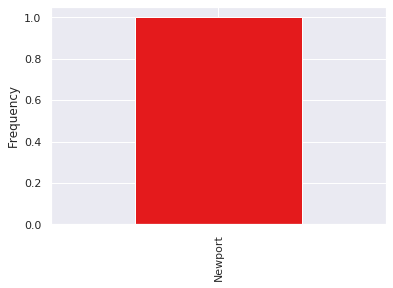

In [47]:
# Plot the counts of serovars to make sure they are all Newport

_ = data8['serovar'].value_counts(normalize = True).plot(kind = 'bar')
_ = plt.ylabel('Frequency')
plt.show()

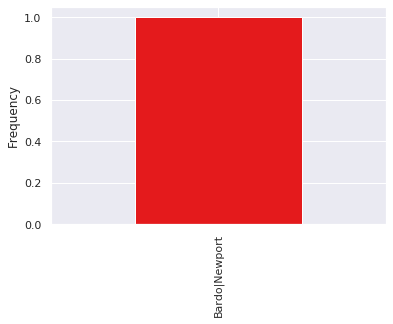

In [48]:
# Plot the counts of serovars to make sure they are all Newport

_ = data8['serovar_antigen'].value_counts(normalize = True).plot(kind = 'bar')
_ = plt.ylabel('Frequency')
plt.show()

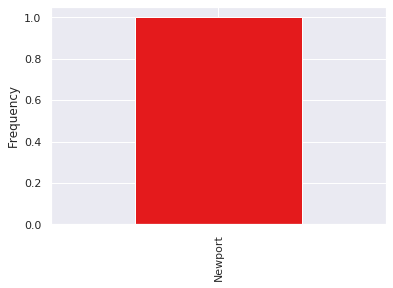

In [49]:
# Plot the counts of serovars to make sure they are all Newport

_ = data8['serovar_cgmlst'].value_counts(normalize = True).plot(kind = 'bar')
_ = plt.ylabel('Frequency')
plt.show()

In [50]:
# Get the value counts for serovars 

data8['serovar'].value_counts()

Newport    2317
Name: serovar, dtype: int64

In [51]:
# Number of observations that were excluded

data7.shape[0] - data8.shape[0]

48

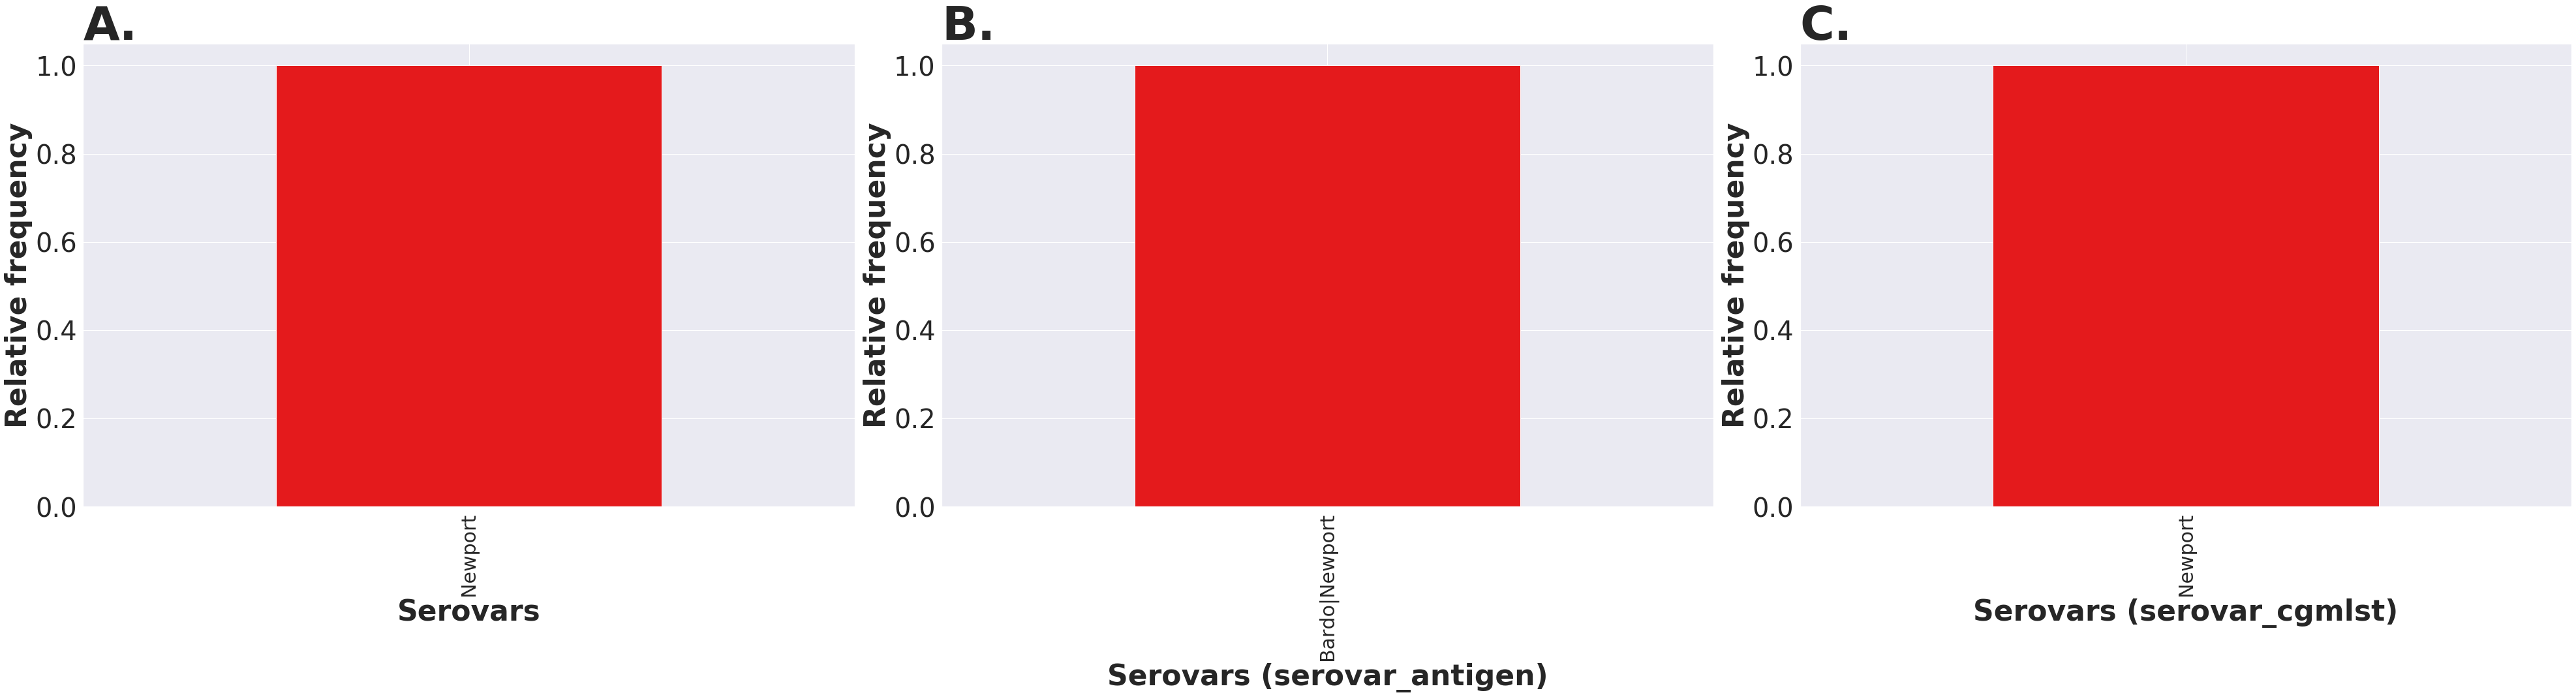

In [56]:
# Set background and number of subplots 

_ = sns.set(style="darkgrid")
fig, ax = plt.subplots(1, 3, figsize=(55, 15))

# Remove default tick marks and labels 

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

# Plot A - checking the serovar column

ax1 = fig.add_subplot(1, 3, 1)
_ = sns.set_palette('Set1', 40)
_ = data8['serovar'].value_counts(normalize = True, ascending = False).plot(kind = 'bar')
_ = plt.xlabel('Serovars', fontsize = 44, weight = 'bold')
_ = plt.ylabel('Relative frequency', fontsize = 44, weight = 'bold')
_ = plt.tick_params(axis = 'x', which = 'major', labelsize = 30, labelrotation = 90)
_ = plt.tick_params(axis = 'y', which = 'major', labelsize = 40)
_ = plt.title('A.', fontsize = 72, weight = 'bold', loc = 'left')

# Plot B - checking the serovar column

ax2 = fig.add_subplot(1, 3, 2)
_ = sns.set_palette('Set1', 40)
_ = data8['serovar_antigen'].value_counts(normalize = True, ascending = False).plot(kind = 'bar')
_ = plt.xlabel('Serovars (serovar_antigen)', fontsize = 44, weight = 'bold')
_ = plt.ylabel('Relative frequency', fontsize = 44, weight = 'bold')
_ = plt.tick_params(axis = 'x', which = 'major', labelsize = 30, labelrotation = 90)
_ = plt.tick_params(axis = 'y', which = 'major', labelsize = 40)
_ = plt.title('B.', fontsize = 72, weight = 'bold', loc = 'left')

# Plot C - checking the serovar column

ax3 = fig.add_subplot(1, 3, 3)
_ = sns.set_palette('Set1', 40)
_ = data8['serovar_cgmlst'].value_counts(normalize = True, ascending = False).plot(kind = 'bar')
_ = plt.xlabel('Serovars (serovar_cgmlst)', fontsize = 44, weight = 'bold')
_ = plt.ylabel('Relative frequency', fontsize = 44, weight = 'bold')
_ = plt.tick_params(axis = 'x', which = 'major', labelsize = 30, labelrotation = 90)
_ = plt.tick_params(axis = 'y', which = 'major', labelsize = 40)
_ = plt.title('C.', fontsize = 72, weight = 'bold', loc = 'left')

# Put a tight layout to organize the panel display evenly

fig.tight_layout()

# Save figure 

#plt.savefig('supplementary_figure_2.png', bbox_inches='tight')

# Save the image in memory in PNG format
png1 = io.BytesIO()
fig.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
png2.save("suplementary_figure_2.tiff")
png1.close()

**Supplemental Fig 2.** **Assessing misclassifications produced by the SISTR program.** (A-C) Serovar distribution produced using the serovar, serovar_antigen, and serovar_cgmlst columns that are present in the SISTR output, after filtering out the *S.* Newport classified isolates only. Relative frequencies in the y-axis sum up to 1 (100%).

# Plotting the ST, cgmlst_ST, and Baps 1-6 distributions 

/home/joaocarlosgomesneto/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/joaocarlosgomesneto/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/joaocarlosgomesneto/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

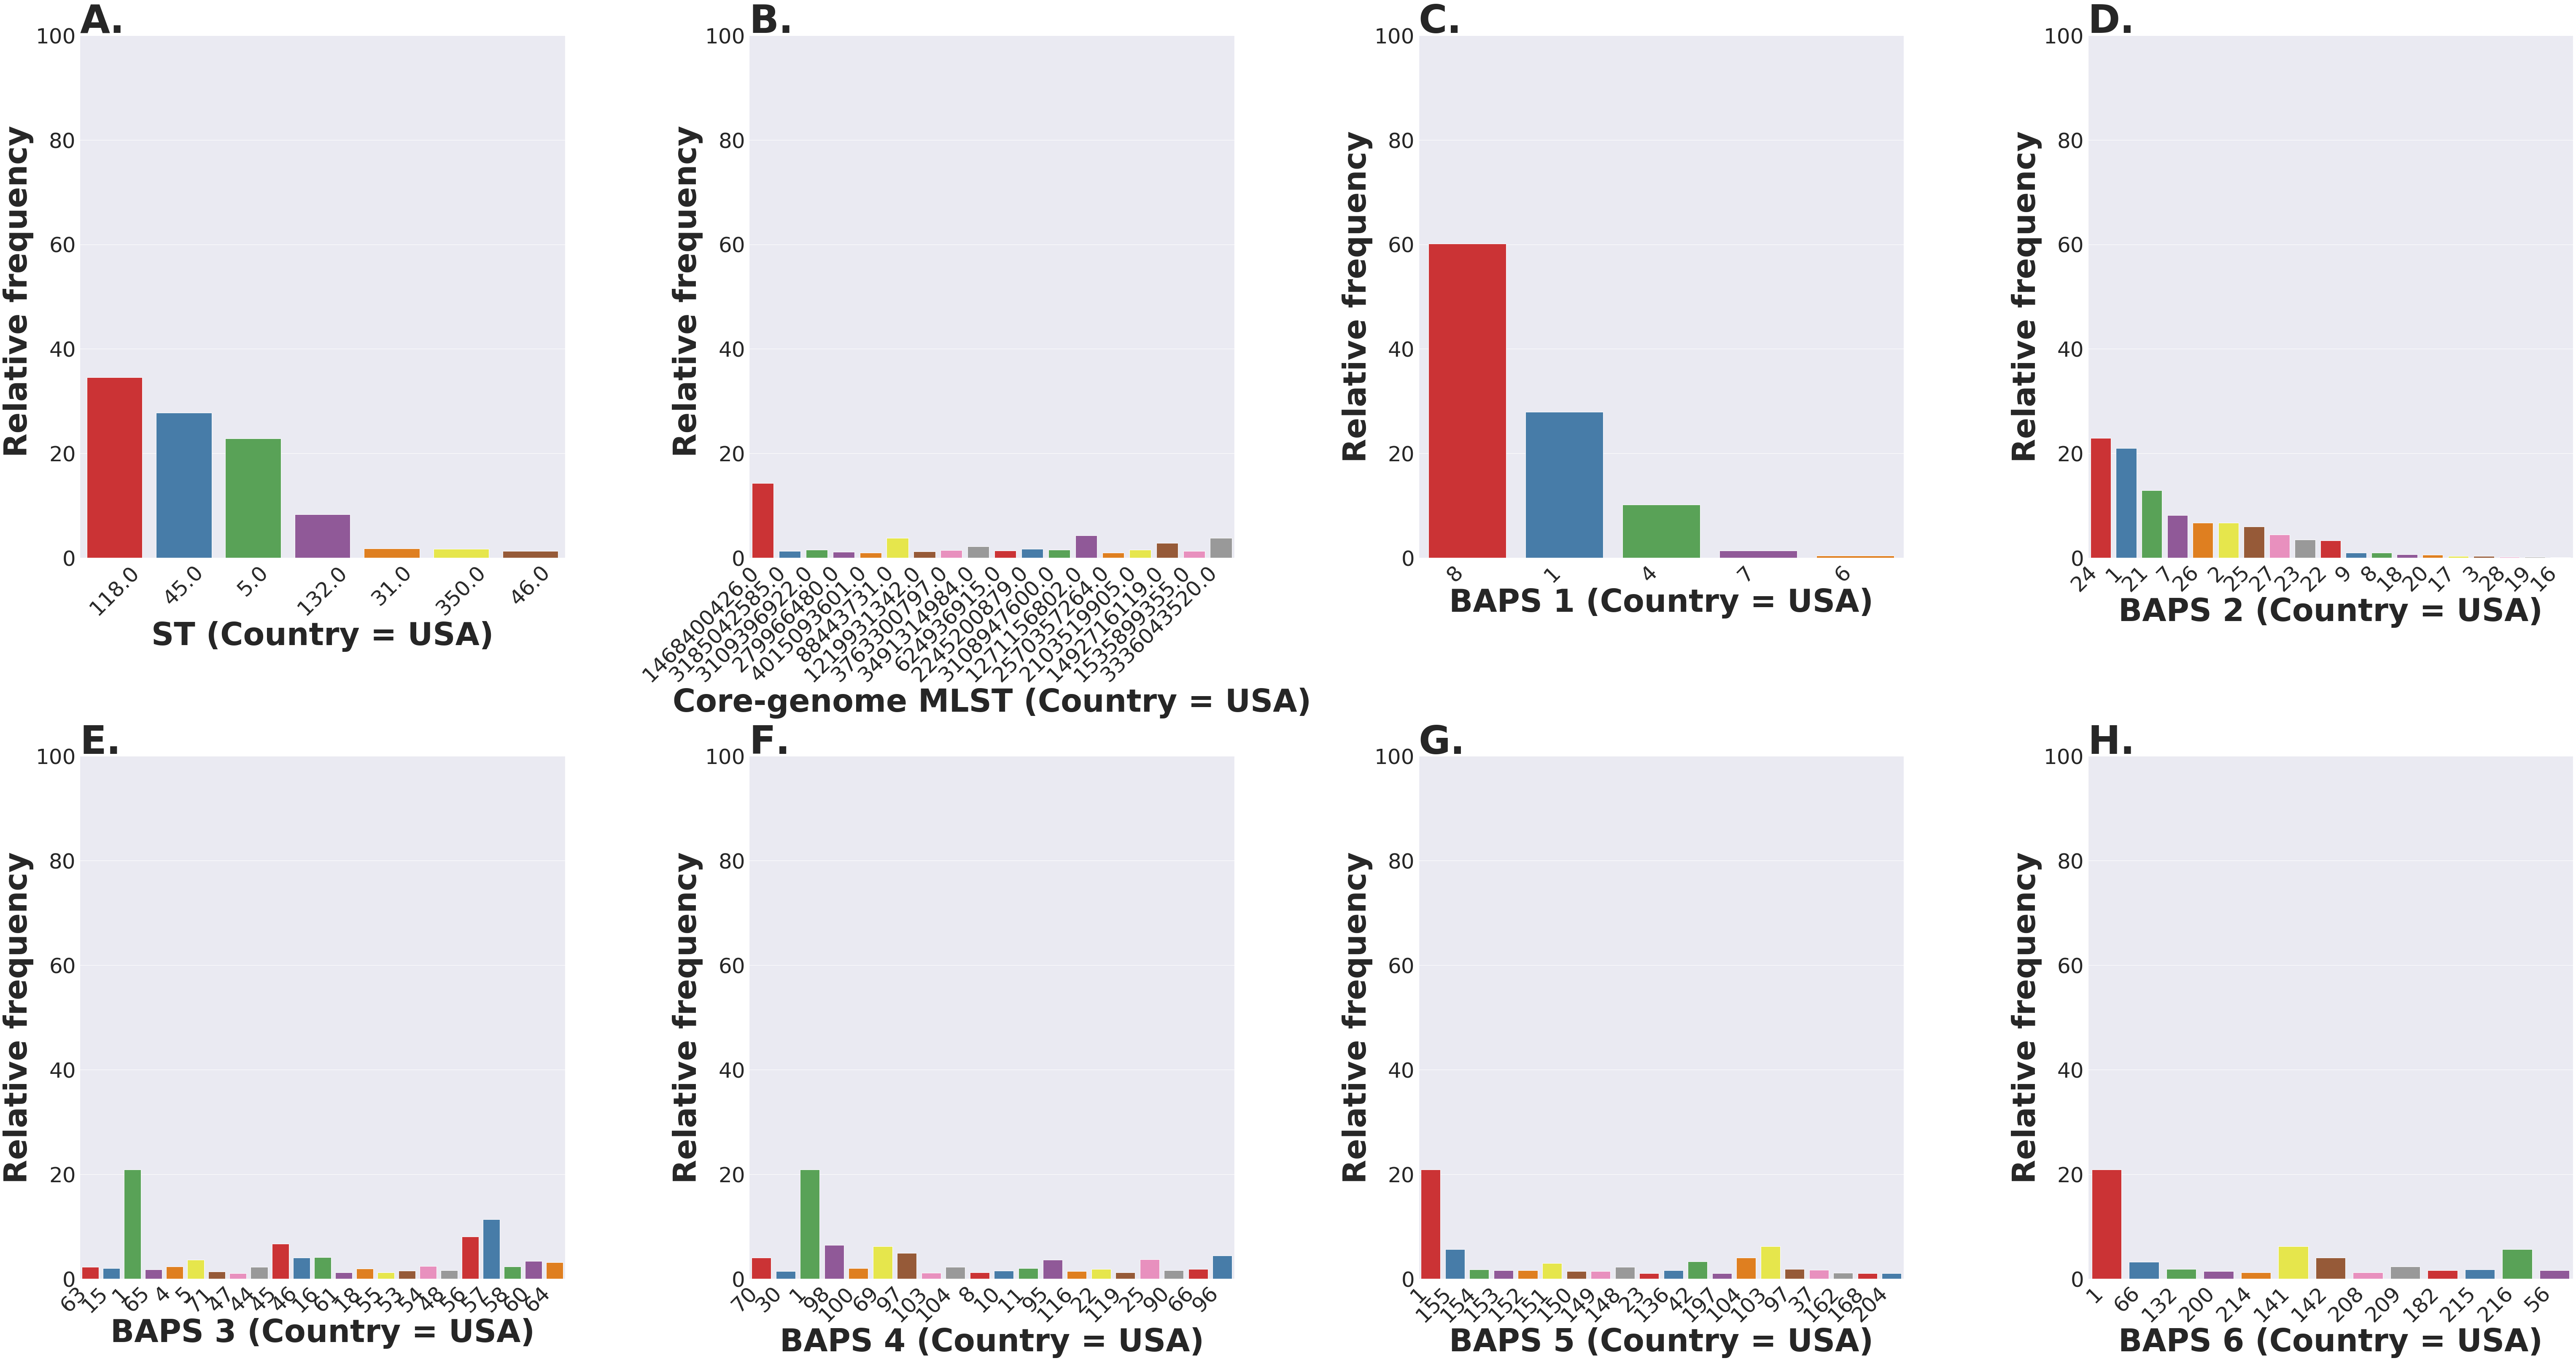

In [59]:
# Set background and number of subplots 

_ = sns.set(style="darkgrid")
fig, ax = plt.subplots(2, 4, figsize=(85, 45))

# Remove default tick marks and labels 

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

############################################################################################################

# Plot the ST distribution (We are filtering relative frequencies that >= 1%)

ax1 = fig.add_subplot(2, 4, 1)
_ = sns.set_palette('Set1', 10)

# I make sure NAs are not impacting the plot
data8['ST'] = data8['ST'].replace('-', np.nan)
data8['ST'] = pd.to_numeric(data8['ST'])
a = data8['ST'].value_counts(dropna = True, normalize = True)*100
df1 = pd.DataFrame(data = a.index, columns = ['ST'])
df2 = pd.DataFrame(data = a.values, columns = ['frequency'])
df = pd.merge(df1, df2, left_index = True, right_index = True)
df3 = df[df['frequency'] >= 1]
_ = sns.barplot(x = df3['ST'], y = df3['frequency'], order = (df3['ST'].value_counts(ascending = True).index))
_ = ax1.set_xlabel('ST (Country = USA)', fontsize = 74, weight = 'bold')
_ = ax1.set_ylabel(' Relative frequency', fontsize = 74, weight = 'bold')
_ = ax1.tick_params(axis = 'x', which = 'major', labelsize = 50, labelrotation = 45)
_ = ax1.tick_params(axis = 'y', which = 'major', labelsize = 50)
_ = ax1.set_ylim([0,100])
_ = ax1.set_title('A.', fontsize = 92, weight = 'bold', loc = 'left')

##############################################################################################################

# Plot the core-genome MLST distribution (We are filtering relative frequencies that >= 1%)

ax2 = fig.add_subplot(2, 4, 2)
_ = sns.set_palette('Set1', 30)
data8['cgmlst_ST'] = data8['cgmlst_ST'].replace('-', np.nan)
data8['cgmlst_ST'] = pd.to_numeric(data8['cgmlst_ST'])
ab = data8['cgmlst_ST'].value_counts(dropna = True, normalize = True)*100
df1a = pd.DataFrame(data = ab.index, columns = ['cgmlst_ST'])
df2a = pd.DataFrame(data = ab.values, columns = ['frequency'])
df = pd.merge(df1a, df2a, left_index = True, right_index = True)
df3a = df[df['frequency'] >= 1]
_ = sns.barplot(x = df3a['cgmlst_ST'], y = df3a['frequency'], order = (df3a['cgmlst_ST'].value_counts(ascending = True).index))
_ = ax2.set_xlabel('Core-genome MLST (Country = USA)', fontsize = 74, weight = 'bold')
_ = ax2.set_ylabel(' Relative frequency', fontsize = 74, weight = 'bold')
_ = ax2.tick_params(axis = 'x', which = 'major', labelsize = 50, labelrotation = 45)
_ = ax2.tick_params(axis = 'y', which = 'major', labelsize = 50)
_ = ax2.set_ylim([0,100])
_ = plt.xticks(horizontalalignment='right')
_ = ax2.set_title('B.', fontsize = 92, weight = 'bold', loc = 'left')

############################################################################################

# Plot the Baps 1 distribution 

ax3 = fig.add_subplot(2, 4, 3)
_ = sns.set_palette('Set1', 30)
_ = sns.barplot(x = 'Baps_1', y = 'Baps_1', data = data8,  estimator = lambda x: len(x) / len(data8) * 100,
               order=(data8['Baps_1'].value_counts().index))
_ = ax3.set_xlabel('BAPS 1 (Country = USA)', fontsize = 74, weight = 'bold')
_ = ax3.set_ylabel('Relative frequency', fontsize = 74, weight = 'bold')
_ = ax3.tick_params(axis = 'x', which = 'major', labelsize = 50, labelrotation = 45)
_ = ax3.tick_params(axis = 'y', which = 'major', labelsize = 50)
_ = ax3.set_ylim([0,100])
_ = plt.xticks(horizontalalignment='right')
_ = ax3.set_title('C.', fontsize = 92, weight = 'bold', loc = 'left')

############################################################################################

# Plot the Baps 2 distribution 

ax4 = fig.add_subplot(2, 4, 4)
_ = sns.set_palette('Set1', 30)
_ = sns.barplot(x = 'Baps_2', y = 'Baps_2', data = data8,  estimator = lambda x: len(x) / len(data8) * 100,
               order=(data8['Baps_2'].value_counts().index))
_ = ax4.set_xlabel('BAPS 2 (Country = USA)', fontsize = 74, weight = 'bold')
_ = ax4.set_ylabel('Relative frequency', fontsize = 74, weight = 'bold')
_ = ax4.tick_params(axis = 'x', which = 'major', labelsize = 50, labelrotation = 45)
_ = ax4.tick_params(axis = 'y', which = 'major', labelsize = 50)
_ = ax4.set_ylim([0,100])
_ = plt.xticks(horizontalalignment='right')
_ = ax4.set_title('D.', fontsize = 92, weight = 'bold', loc = 'left')

############################################################################################

# Plot the Baps 3 distribution (We are filtering relative frequencies that >= 1%)

ax5 = fig.add_subplot(2, 4, 5)
_ = sns.set_palette('Set1', 60)
a = data8['Baps_3'].value_counts(normalize = True)*100
df1 = pd.DataFrame(data=a.index, columns=['Baps_3'])
df2 = pd.DataFrame(data=a.values, columns=['frequency'])
df = pd.merge(df1, df2, left_index=True, right_index=True)
df3 = df[df['frequency'] >= 1]
_ = sns.barplot(x = 'Baps_3', y = 'frequency', data = df3,
               order=(df3['Baps_3'].value_counts().index))
_ = ax5.set_xlabel('BAPS 3 (Country = USA)', fontsize = 74, weight = 'bold')
_ = ax5.set_ylabel('Relative frequency', fontsize = 74, weight = 'bold')
_ = ax5.tick_params(axis = 'x', which = 'major', labelsize = 50, labelrotation = 45)
_ = ax5.tick_params(axis = 'y', which = 'major', labelsize = 50)
_ = ax5.set_ylim([0,100])
_ = plt.xticks(horizontalalignment='right')
_ = ax5.set_title('E.', fontsize = 92, weight = 'bold', loc = 'left')

############################################################################################

# Plot the Baps 4 distribution (We are filtering relative frequencies that >= 1%)

ax6 = fig.add_subplot(2, 4, 6)
_ = sns.set_palette('Set1', 60)
a = data8['Baps_4'].value_counts(normalize = True)*100
df1 = pd.DataFrame(data=a.index, columns=['Baps_4'])
df2 = pd.DataFrame(data=a.values, columns=['frequency'])
df = pd.merge(df1, df2, left_index=True, right_index=True)
df3 = df[df['frequency'] >= 1]
_ = sns.barplot(x = 'Baps_4', y = 'frequency', data = df3,
               order=(df3['Baps_4'].value_counts().index))
_ = ax6.set_xlabel('BAPS 4 (Country = USA)', fontsize = 74, weight = 'bold')
_ = ax6.set_ylabel('Relative frequency', fontsize = 74, weight = 'bold')
_ = ax6.tick_params(axis = 'x', which = 'major', labelsize = 50, labelrotation = 45)
_ = ax6.tick_params(axis = 'y', which = 'major', labelsize = 50)
_ = ax6.set_ylim([0,100])
_ = plt.xticks(horizontalalignment='right')
_ = ax6.set_title('F.', fontsize = 92, weight = 'bold', loc = 'left')

############################################################################################

# Plot the Baps 5 distribution (We are filtering relative frequencies that >= 1%)

ax7 = fig.add_subplot(2, 4, 7)
_ = sns.set_palette('Set1', 30)
a = data8['Baps_5'].value_counts(normalize = True)*100
df1 = pd.DataFrame(data=a.index, columns=['Baps_5'])
df2 = pd.DataFrame(data=a.values, columns=['frequency'])
df = pd.merge(df1, df2, left_index=True, right_index=True)
df3 = df[df['frequency'] >= 1]
_ = sns.barplot(x = 'Baps_5', y = 'frequency', data = df3,
               order=(df3['Baps_5'].value_counts(ascending = True).index))
_ = ax7.set_xlabel('BAPS 5 (Country = USA)', fontsize = 74, weight = 'bold')
_ = ax7.set_ylabel('Relative frequency', fontsize = 74, weight = 'bold')
_ = ax7.tick_params(axis = 'x', which = 'major', labelsize = 50, labelrotation = 45)
_ = ax7.tick_params(axis = 'y', which = 'major', labelsize = 50)
_ = ax7.set_ylim([0,100])
_ = plt.xticks(horizontalalignment='right')
_ = ax7.set_title('G.', fontsize = 92, weight = 'bold', loc = 'left')

############################################################################################

# Plot the Baps 6 distribution (We are filtering relative frequencies that >= 1%)

ax8 = fig.add_subplot(2, 4, 8)
_ = sns.set_palette('Set1', 30)
a = data8['Baps_6'].value_counts(normalize = True)*100
df1 = pd.DataFrame(data=a.index, columns=['Baps_6'])
df2 = pd.DataFrame(data=a.values, columns=['frequency'])
df = pd.merge(df1, df2, left_index=True, right_index=True)
df3 = df[df['frequency'] >= 1]
_ = sns.barplot(x = 'Baps_6', y = 'frequency', data = df3,
               order=(df3['Baps_6'].value_counts(ascending = True).index))
_ = ax8.set_xlabel('BAPS 6 (Country = USA)', fontsize = 74, weight = 'bold')
_ = ax8.set_ylabel('Relative frequency', fontsize = 74, weight = 'bold')
_ = ax8.tick_params(axis = 'x', which = 'major', labelsize = 50, labelrotation = 45)
_ = ax8.tick_params(axis = 'y', which = 'major', labelsize = 50)
_ = ax8.set_ylim([0,100])
_ = plt.xticks(horizontalalignment='right')
_ = ax8.set_title('H.', fontsize = 92, weight = 'bold', loc = 'left')

# Put a tight layout to organize the panel display evenly

_ = fig.tight_layout()

# Save figure 

#plt.savefig('Figure1.png', bbox_inches='tight')

# Save the image in memory in PNG format
png1 = io.BytesIO()
fig.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
png2.save("Figure_3.tiff")
png1.close()

**Fig 3.** ***Salmonella* Newport (USA) population stratification by haplotype classification using two methods: allelic calls or BAPS**. (A) ST distribution based on seven loci using the mlst program which is based on the PubMLST typing schemes (excluding STs with relative frequency below 1%). (B) Core-genome MLST distribution based on SISTR (excluding STs with relative frequency below 1%). (C-H) BAPS levels 1-6 relative frequencies. For BAPS 3-6, we have exclused sub-groups that were below 1% in relative frequency.

/home/joaocarlosgomesneto/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/joaocarlosgomesneto/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/joaocarlosgomesneto/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

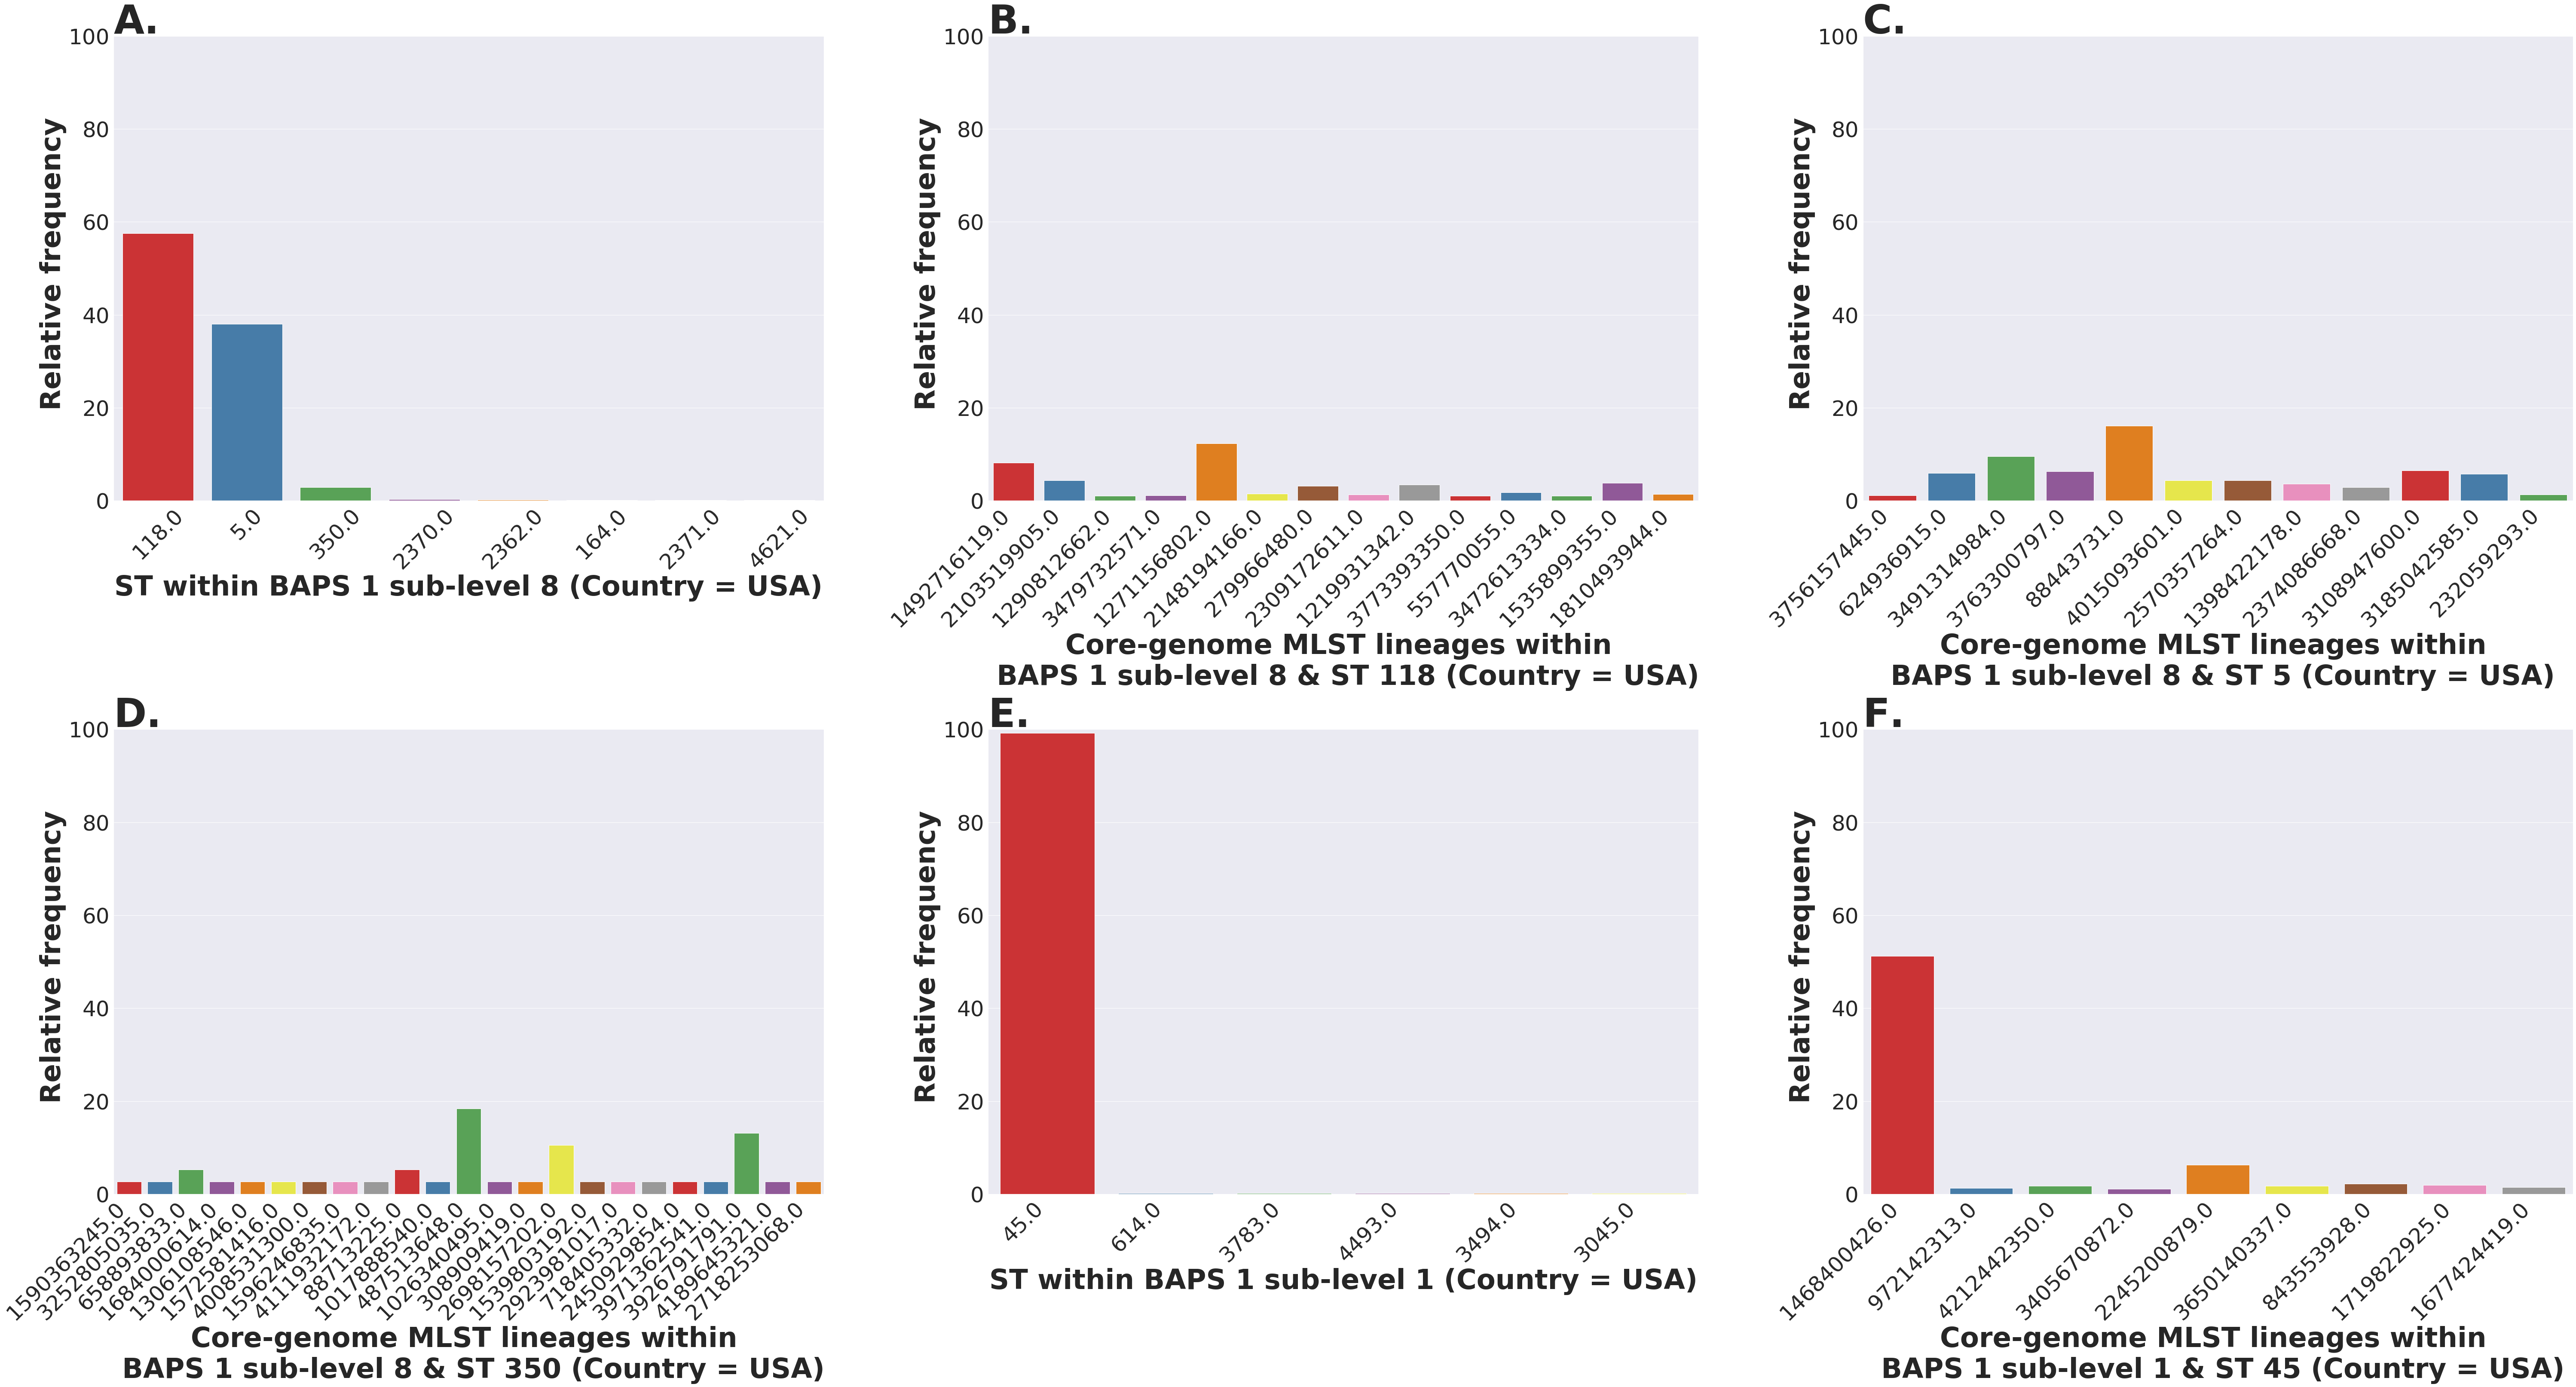

In [60]:
# Depicting the hierarchical structure of the population 

# Set background and number of subplots 

_ = sns.set(style="darkgrid")
fig, ax = plt.subplots(2, 3, figsize=(85, 45))

# Remove default tick marks and labels 

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

##############################################################################################################

# Filter Baps1|sub-level 8, display the ST distribution, and then filter the most dominant ST and display of cgmlst_ST distribution

ax1 = fig.add_subplot(2, 3, 1)
_ = sns.set_palette('Set1', 20)

# Filtering STs above 0.1% of relative frequency

data9 = data8[data8['Baps_1'] == 8]
data9['ST'] = data9['ST'].replace('-', np.nan)
data9['ST'] = pd.to_numeric(data9['ST'])
a = data9['ST'].value_counts(dropna = True, normalize = True)*100
df1 = pd.DataFrame(data = a.index, columns = ['ST'])
df2 = pd.DataFrame(data = a.values, columns = ['frequency'])
df = pd.merge(df1, df2, left_index = True, right_index = True)
df3 = df[df['frequency'] >= 0.1]
_ = sns.barplot(x = df3['ST'], y = df3['frequency'], order = (df3['ST'].value_counts(ascending = True).index))
_ = ax1.set_xlabel('ST within BAPS 1 sub-level 8 (Country = USA)', fontsize = 64, weight = 'bold')
_ = ax1.set_ylabel(' Relative frequency', fontsize = 64, weight = 'bold')
_ = ax1.tick_params(axis = 'x', which = 'major', labelsize = 50, labelrotation = 45)
_ = ax1.tick_params(axis = 'y', which = 'major', labelsize = 50)
_ = ax1.set_ylim([0,100])
_ = ax1.set_title('A.', fontsize = 92, weight = 'bold', loc = 'left')

# Filter Baps1|sub-level 8|ST118 and display of cgmlst_ST distribution

ax1 = fig.add_subplot(2, 3, 2)
_ = sns.set_palette('Set1', 20)

# Filtering cgmlst_STs above 1% of relative frequency

data10 = data9[data9['ST'] == 118]
data10['cgmlst_ST'] = data9['cgmlst_ST'].replace('-', np.nan)
data10['cgmlst_ST'] = pd.to_numeric(data10['cgmlst_ST'])
a = data10['cgmlst_ST'].value_counts(dropna = True, normalize = True)*100
df1 = pd.DataFrame(data = a.index, columns = ['cgmlst_ST'])
df2 = pd.DataFrame(data = a.values, columns = ['frequency'])
df = pd.merge(df1, df2, left_index = True, right_index = True)
df3 = df[df['frequency'] >= 1]
_ = sns.barplot(x = df3['cgmlst_ST'], y = df3['frequency'], order = (df3['cgmlst_ST'].value_counts(ascending = True).index))
_ = ax1.set_xlabel('Core-genome MLST lineages within \n BAPS 1 sub-level 8 & ST 118 (Country = USA)', fontsize = 64, weight = 'bold')
_ = ax1.set_ylabel(' Relative frequency', fontsize = 64, weight = 'bold')
_ = ax1.tick_params(axis = 'x', which = 'major', labelsize = 50, labelrotation = 45)
_ = ax1.tick_params(axis = 'y', which = 'major', labelsize = 50)
_ = ax1.set_ylim([0,100])
_ = plt.xticks(horizontalalignment='right')
_ = ax1.set_title('B.', fontsize = 92, weight = 'bold', loc = 'left')

##############################################################################################################

# Filter Baps1|sub-level 8|ST5 and display of cgmlst_ST distribution

ax1 = fig.add_subplot(2, 3, 3)
_ = sns.set_palette('Set1', 20)

# Filtering cgmlst_STs above 1% of relative frequency

data10 = data9[data9['ST'] == 5]
data10['cgmlst_ST'] = data9['cgmlst_ST'].replace('-', np.nan)
data10['cgmlst_ST'] = pd.to_numeric(data10['cgmlst_ST'])
a = data10['cgmlst_ST'].value_counts(dropna = True, normalize = True)*100
df1 = pd.DataFrame(data = a.index, columns = ['cgmlst_ST'])
df2 = pd.DataFrame(data = a.values, columns = ['frequency'])
df = pd.merge(df1, df2, left_index = True, right_index = True)
df3 = df[df['frequency'] >= 1]
_ = sns.barplot(x = df3['cgmlst_ST'], y = df3['frequency'], order = (df3['cgmlst_ST'].value_counts(ascending = True).index))
_ = ax1.set_xlabel('Core-genome MLST lineages within \n BAPS 1 sub-level 8 & ST 5 (Country = USA)', fontsize = 64, weight = 'bold')
_ = ax1.set_ylabel(' Relative frequency', fontsize = 64, weight = 'bold')
_ = ax1.tick_params(axis = 'x', which = 'major', labelsize = 50, labelrotation = 45)
_ = ax1.tick_params(axis = 'y', which = 'major', labelsize = 50)
_ = ax1.set_ylim([0,100])
_ = plt.xticks(horizontalalignment='right')
_ = ax1.set_title('C.', fontsize = 92, weight = 'bold', loc = 'left')

##############################################################################################################

# Filter Baps1|sub-level 8|ST350 and display of cgmlst_ST distribution

ax1 = fig.add_subplot(2, 3, 4)
_ = sns.set_palette('Set1', 40)

# Filtering cgmlst_STs above 1% of relative frequency

data10 = data9[data9['ST'] == 350]
data10['cgmlst_ST'] = data9['cgmlst_ST'].replace('-', np.nan)
data10['cgmlst_ST'] = pd.to_numeric(data10['cgmlst_ST'])
a = data10['cgmlst_ST'].value_counts(dropna = True, normalize = True)*100
df1 = pd.DataFrame(data = a.index, columns = ['cgmlst_ST'])
df2 = pd.DataFrame(data = a.values, columns = ['frequency'])
df = pd.merge(df1, df2, left_index = True, right_index = True)
df3 = df[df['frequency'] >= 1]
_ = sns.barplot(x = df3['cgmlst_ST'], y = df3['frequency'], order = (df3['cgmlst_ST'].value_counts(ascending = True).index))
_ = ax1.set_xlabel('Core-genome MLST lineages within \n BAPS 1 sub-level 8 & ST 350 (Country = USA)', fontsize = 64, weight = 'bold')
_ = ax1.set_ylabel(' Relative frequency', fontsize = 64, weight = 'bold')
_ = ax1.tick_params(axis = 'x', which = 'major', labelsize = 50, labelrotation = 45)
_ = ax1.tick_params(axis = 'y', which = 'major', labelsize = 50)
_ = ax1.set_ylim([0,100])
_ = plt.xticks(horizontalalignment='right')
_ = ax1.set_title('D.', fontsize = 92, weight = 'bold', loc = 'left')

##############################################################################################################

# Filter Baps1|sub-level 1, display the ST distribution, and then filter the most dominant ST and display of cgmlst_ST distribution

ax1 = fig.add_subplot(2, 3, 5)
_ = sns.set_palette('Set1', 20)

# Filtering STs above 0.1% of relative frequency

data9 = data8[data8['Baps_1'] == 1]
data9['ST'] = data9['ST'].replace('-', np.nan)
data9['ST'] = pd.to_numeric(data9['ST'])
a = data9['ST'].value_counts(dropna = True, normalize = True)*100
df1 = pd.DataFrame(data = a.index, columns = ['ST'])
df2 = pd.DataFrame(data = a.values, columns = ['frequency'])
df = pd.merge(df1, df2, left_index = True, right_index = True)
df3 = df[df['frequency'] >= 0.1]
_ = sns.barplot(x = df3['ST'], y = df3['frequency'], order = (df3['ST'].value_counts(ascending = True).index))
_ = ax1.set_xlabel('ST within BAPS 1 sub-level 1 (Country = USA)', fontsize = 64, weight = 'bold')
_ = ax1.set_ylabel(' Relative frequency', fontsize = 64, weight = 'bold')
_ = ax1.tick_params(axis = 'x', which = 'major', labelsize = 50, labelrotation = 45)
_ = ax1.tick_params(axis = 'y', which = 'major', labelsize = 50)
_ = ax1.set_ylim([0,100])
_ = plt.xticks(horizontalalignment='right')
_ = ax1.set_title('E.', fontsize = 92, weight = 'bold', loc = 'left')

##############################################################################################################

# Filter Baps1|sub-level 1|ST45 and display of cgmlst_ST distribution

ax1 = fig.add_subplot(2, 3, 6)
_ = sns.set_palette('Set1', 40)

# Filtering cgmlst_STs above 1% of relative frequency

data10 = data9[data9['ST'] == 45]
data10['cgmlst_ST'] = data9['cgmlst_ST'].replace('-', np.nan)
data10['cgmlst_ST'] = pd.to_numeric(data10['cgmlst_ST'])
a = data10['cgmlst_ST'].value_counts(dropna = True, normalize = True)*100
df1 = pd.DataFrame(data = a.index, columns = ['cgmlst_ST'])
df2 = pd.DataFrame(data = a.values, columns = ['frequency'])
df = pd.merge(df1, df2, left_index = True, right_index = True)
df3 = df[df['frequency'] >= 1]
_ = sns.barplot(x = df3['cgmlst_ST'], y = df3['frequency'], order = (df3['cgmlst_ST'].value_counts(ascending = True).index))
_ = ax1.set_xlabel('Core-genome MLST lineages within \n BAPS 1 sub-level 1 & ST 45 (Country = USA)', fontsize = 64, weight = 'bold')
_ = ax1.set_ylabel(' Relative frequency', fontsize = 64, weight = 'bold')
_ = ax1.tick_params(axis = 'x', which = 'major', labelsize = 50, labelrotation = 45)
_ = ax1.tick_params(axis = 'y', which = 'major', labelsize = 50)
_ = ax1.set_ylim([0,100])
_ = plt.xticks(horizontalalignment='right')
_ = ax1.set_title('F.', fontsize = 92, weight = 'bold', loc = 'left')

# Put a tight layout to organize the panel display evenly

_ = fig.tight_layout()

# Save figure 

#plt.savefig('Figure2.png', bbox_inches='tight')

# Save the image in memory in PNG format
png1 = io.BytesIO()
fig.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
png2.save("Figure_4.tiff")
png1.close()

**Fig 4.** ***Salmonella* Newport (USA) hierarchical population-based analysis**. (A) ST distribution with BAPS 1 sub-level 8 (excluding STs with relative frequency below 0.1%). (B) Core-genome MLST lineage distribution within BAPS 1 sub-level 8 & ST118 (excluding lineages with relative frequency below 1%). (C) Core-genome MLST lineage distribution within BAPS 1 sub-level 8 & ST5 (excluding lineages with relative frequency below 1%). (D) Core-genome MLST lineage distribution within BAPS 1 sub-level 8 & ST350 (excluding lineages with relative frequency below 1%). (E) ST distribution with BAPS 1 sub-level 1 (excluding STs with relative frequency below 0.1%). (F) Core-genome MLST lineage distribution within BAPS 1 sub-level 1 & ST45 (excluding lineages with relative frequency below 1%).  

In [112]:
# data of file generation on 9/19/2019 (when we got the SRA ids)

In [62]:
a = data8[data8['cgmlst_ST'] == 1468400426]

In [63]:
a['ST'].value_counts()

45.0      319
3045.0      1
4493.0      1
Name: ST, dtype: int64

/home/joaocarlosgomesneto/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


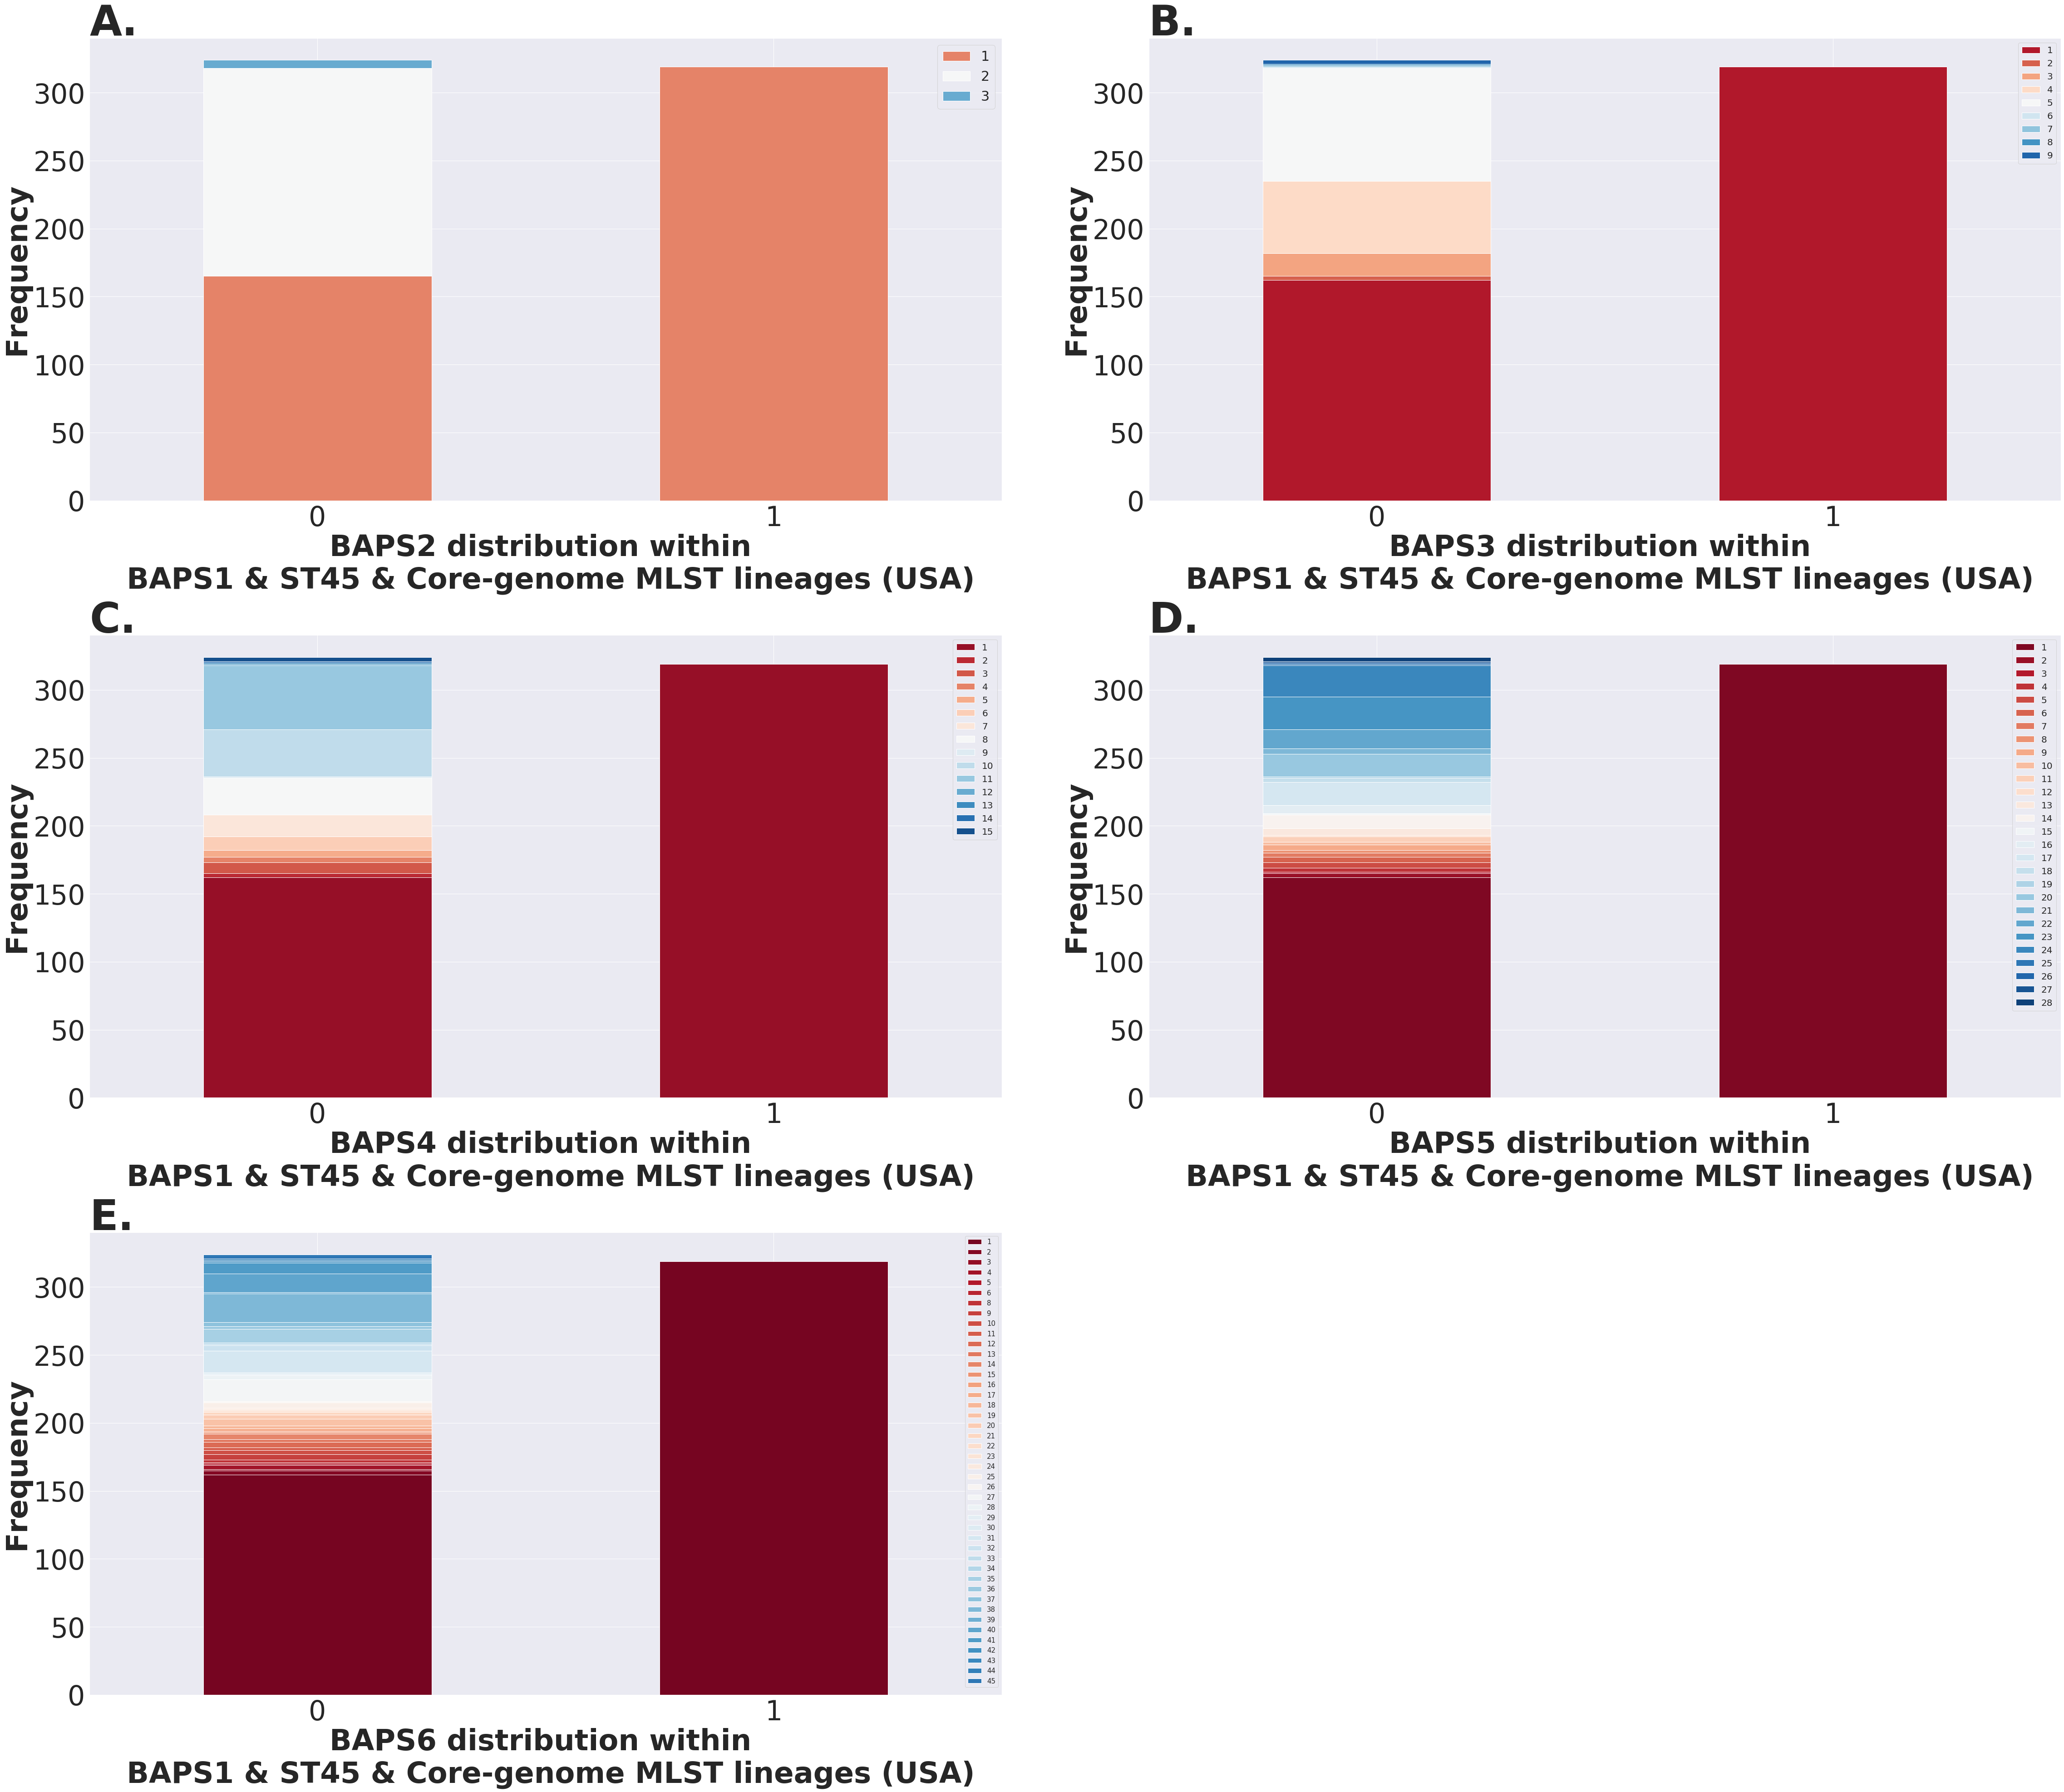

In [61]:
# Plot the haplotype variation for Baps1 & ST45 & core-genome mlst 1468400426.0 vs others 

# Set background and number of subplots 

_ = sns.set(style="darkgrid")
fig, ax = plt.subplots(3, 2, figsize=(65, 55))

# Remove default tick marks and labels 

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

##############################################################################################################

# Let's create a column that produces a binary call (1 if cgmlst_ST is 1468400426.0 and if else 0)

data8['lineage'] = data8['cgmlst_ST'].apply(lambda x: 1 if x == 1468400426 else 0)

# Let's now sort Baps 1 and ST 45

data9 = data8.loc[(data8['Baps_1'] == 1) & (data8['ST'] == 45)]

ax1 = fig.add_subplot(3, 2, 1)
sns.set_palette("RdBu", 3)
baps_st = pd.crosstab(data9['lineage'], data9['Baps_2'])
_ = baps_st.plot.bar(stacked=True, ax = ax1)
_ = ax1.set_xlabel('BAPS2 distribution within \n BAPS1 & ST45 & Core-genome MLST lineages (USA)', fontsize = 64, weight = 'bold')
_ = ax1.set_ylabel('Frequency', fontsize = 64, weight = 'bold')
_ = ax1.tick_params(axis = 'x', which = 'major', labelsize = 60, labelrotation = 0)
_ = ax1.tick_params(axis = 'y', which = 'major', labelsize = 60)
_ = ax1.set_title('A.', fontsize = 92, weight = 'bold', loc = 'left')
plt.legend(fontsize = 30)

ax2 = fig.add_subplot(3, 2, 2)
sns.set_palette("RdBu", 9)
baps_st = pd.crosstab(data9['lineage'], data9['Baps_3'])
_ = baps_st.plot.bar(stacked=True, ax = ax2)
_ = ax2.set_xlabel('BAPS3 distribution within \n BAPS1 & ST45 & Core-genome MLST lineages (USA)', fontsize = 64, weight = 'bold')
_ = ax2.set_ylabel('Frequency', fontsize = 64, weight = 'bold')
_ = ax2.tick_params(axis = 'x', which = 'major', labelsize = 60, labelrotation = 0)
_ = ax2.tick_params(axis = 'y', which = 'major', labelsize = 60)
_ = ax2.set_title('B.', fontsize = 92, weight = 'bold', loc = 'left')
plt.legend(fontsize = 20)

ax3 = fig.add_subplot(3, 2, 3)
sns.set_palette("RdBu", 15)
baps_st = pd.crosstab(data9['lineage'], data9['Baps_4'])
_ = baps_st.plot.bar(stacked=True, ax = ax3)
_ = ax3.set_xlabel('BAPS4 distribution within \n BAPS1 & ST45 & Core-genome MLST lineages (USA)', fontsize = 64, weight = 'bold')
_ = ax3.set_ylabel('Frequency', fontsize = 64, weight = 'bold')
_ = ax3.tick_params(axis = 'x', which = 'major', labelsize = 60, labelrotation = 0)
_ = ax3.tick_params(axis = 'y', which = 'major', labelsize = 60)
_ = ax3.set_title('C.', fontsize = 92, weight = 'bold', loc = 'left')
plt.legend(fontsize = 20)

ax4 = fig.add_subplot(3, 2, 4)
sns.set_palette("RdBu", 28)
baps_st = pd.crosstab(data9['lineage'], data9['Baps_5'])
_ = baps_st.plot.bar(stacked=True, ax = ax4)
_ = ax4.set_xlabel('BAPS5 distribution within \n BAPS1 & ST45 & Core-genome MLST lineages (USA)', fontsize = 64, weight = 'bold')
_ = ax4.set_ylabel('Frequency', fontsize = 64, weight = 'bold')
_ = ax4.tick_params(axis = 'x', which = 'major', labelsize = 60, labelrotation = 0)
_ = ax4.tick_params(axis = 'y', which = 'major', labelsize = 60)
_ = ax4.set_title('D.', fontsize = 92, weight = 'bold', loc = 'left')
plt.legend(fontsize = 20)

ax5 = fig.add_subplot(3, 2, 5)
sns.set_palette("RdBu", 50)
baps_st = pd.crosstab(data9['lineage'], data9['Baps_6'])
_ = baps_st.plot.bar(stacked=True, ax = ax5)
_ = ax5.set_xlabel('BAPS6 distribution within \n BAPS1 & ST45 & Core-genome MLST lineages (USA)', fontsize = 64, weight = 'bold')
_ = ax5.set_ylabel('Frequency', fontsize = 64, weight = 'bold')
_ = ax5.tick_params(axis = 'x', which = 'major', labelsize = 60, labelrotation = 0)
_ = ax5.tick_params(axis = 'y', which = 'major', labelsize = 60)
_ = ax5.set_title('E.', fontsize = 92, weight = 'bold', loc = 'left')

plt.legend(fontsize = 15)

# Put a tight layout to organize the panel display evenly

_ = fig.tight_layout()

# Remove the last plot

ax.flat[-1].set_visible(False)

# Save figure 

#plt.savefig('Figure3.png', bbox_inches='tight')

# Save the image in memory in PNG format
png1 = io.BytesIO()
fig.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
png2.save("Figure_5.tiff")
png1.close()

**Fig 5.** **BAPS2-6 frequency of core-genome MLST lineages with BAPS1 and ST45.** First, core-genome MLST lineages were classified as 1 if valued as 1468400426, and 0 otherwise. Core-genome MLST is the major lineage within BAPS1 and ST45. The goal was to compare the distribution of BAPS2-6 between 1468400426 or the other lineages as a sub-population of BAPS1 and ST45. (A-E) Frequency of BAPS2-6, respectively, when comparing group classified as 1 (core-genome MLST = 1468400426) or 0 (core-genome MLST = others), within BAPS1 and ST45, as part of a hierarchical approach for analysis of the *S.* Newport population in the United States (USA).

# Producing a labeling or variables files to pass with a phylogenetic tree on phandango

In [65]:
# Check the columns for data8

data8.columns

Index(['id', 'Baps_1', 'Baps_2', 'Baps_3', 'Baps_4', 'Baps_5', 'Baps_6', 'ST',
       'aroC', 'dnaN', 'hemD', 'hisD', 'purE', 'sucA', 'thrA', 'cgmlst_ST',
       'qc_status', 'serovar', 'serovar_antigen', 'serovar_cgmlst', 'lineage'],
      dtype='object')

In [66]:
# Check the shape of data8

data8.shape

(2317, 21)

In [67]:
# Subset the dataset to have on id, Baps_1, ST, and lineage

list_of_col = ['id', 'Baps_1', 'ST', 'lineage']

data9 = data8[list_of_col]
data9.head()

id  Baps_1     ST  lineage
0  SRR1002805       8  118.0        0
1  SRR1002816       8  118.0        0
2  SRR1002817       1   45.0        1
3  SRR1002827       1   45.0        1
4  SRR1002828       1   45.0        1

In [68]:
# Check the shape of the data

data9.shape

(2317, 4)

In [69]:
# Create a dictionary to generate a new column with reduced number of STs

values_dict = {5.0 : 5, 45.0 : 45, 118.0: 118, 132.0 : 132}

# Create the new column
data9['st'] = data9['ST'].map(values_dict)

# Remove the ST column

data9 = data9.drop(['ST'], axis = 1)
data9.head()

/home/joaocarlosgomesneto/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


id  Baps_1  lineage     st
0  SRR1002805       8        0  118.0
1  SRR1002816       8        0  118.0
2  SRR1002817       1        1   45.0
3  SRR1002827       1        1   45.0
4  SRR1002828       1        1   45.0

In [70]:
# Rename column

data9 = data9.rename(columns = {'st': 'ST'})

data9.head()

id  Baps_1  lineage     ST
0  SRR1002805       8        0  118.0
1  SRR1002816       8        0  118.0
2  SRR1002817       1        1   45.0
3  SRR1002827       1        1   45.0
4  SRR1002828       1        1   45.0

In [71]:
# Replace blank spaces with zero

data9 = data9.replace(' ', np.nan)
data9 = data9.fillna(0)
data9.head()

id  Baps_1  lineage     ST
0  SRR1002805       8        0  118.0
1  SRR1002816       8        0  118.0
2  SRR1002817       1        1   45.0
3  SRR1002827       1        1   45.0
4  SRR1002828       1        1   45.0

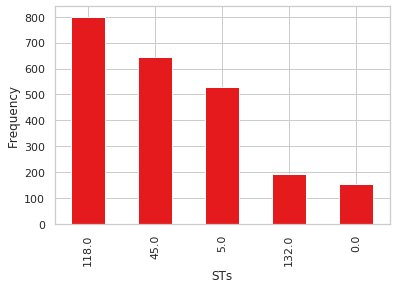

In [72]:
# Now let's plot to make sure it worked

_ = data9['ST'].value_counts().plot(kind = 'bar')
_ = plt.xlabel('STs')
_ = plt.ylabel('Frequency')
plt.show()

In [73]:
# Rename columns before exporting it

data9 = data9.rename(columns = {'Baps_1': 'BAPS 1', 'lineage': 'Core-genome MLST'})
data9.head()

id  BAPS 1  Core-genome MLST     ST
0  SRR1002805       8                 0  118.0
1  SRR1002816       8                 0  118.0
2  SRR1002817       1                 1   45.0
3  SRR1002827       1                 1   45.0
4  SRR1002828       1                 1   45.0

In [74]:
# Re-order columns before exporting it

data9 = data9[['id', 'BAPS 1', 'ST', 'Core-genome MLST']]
data9.head()

id  BAPS 1     ST  Core-genome MLST
0  SRR1002805       8  118.0                 0
1  SRR1002816       8  118.0                 0
2  SRR1002817       1   45.0                 1
3  SRR1002827       1   45.0                 1
4  SRR1002828       1   45.0                 1

In [75]:
# Export the subsetted data frame

data9.to_csv('/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_newport/data/data9.csv', header=True, index=False)

In [130]:
# Import accessory genome clustering plot

path_figure = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_newport/data/accessory_genome_clust_newport.pdf'
supplementary_figure_3 = WImage(filename = path_figure, width=600, height=500)
supplementary_figure_3

# Save the image in memory in PNG format
png1 = io.BytesIO()
fig.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
png2.save("supplementary_figure_3.tiff")
png1.close()

**Supplemental Fig 3.** **Accessory genome based clustering of *S*. Newport isolates.** Clustering of *S*. Newport isolates from USA based on the presence and absence of accessory genes. Overlaid onto it are three other sources of information (from left to right): 1) BAPS leve 1 clustering; 2) ST classification; and 3) Core-genome MLST lineage distribution. Here, we are particularly interested in showing the hierachical distribution of BAPS1 sub-level1 & ST45, from which in yellow it shows the core-genome MLST lineage 1468400426, vs the others in purple. At least in this dataset, this core-genome MLST "clone" clusters homogenously based on the accessory genome. 

# Identifying ST45 differentiating genes

In [77]:
# Data for scoary (ST45 = 1, others = 0)

data9 = data9.set_index('id')
newport_usa_scoary = data9[['ST']]
traits = newport_usa_scoary
traits['ST'] = traits['ST'].replace('-', np.nan).dropna(axis = 0)
traits['ST'] = pd.to_numeric(traits['ST'])
traits.is_copy = False
traits['Trait1'] = [1 if x == 45 else 0 for x in traits['ST']]
traits = traits.drop('ST', axis = 1)
traits = traits.reset_index()
traits.head()

/home/joaocarlosgomesneto/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/joaocarlosgomesneto/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/joaocarlosgomesneto/.local/lib/python3.7/site-packages/pandas/core/generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/joaoca

id  Trait1
0  SRR1002805       0
1  SRR1002816       0
2  SRR1002817       1
3  SRR1002827       1
4  SRR1002828       1

In [78]:
# Check the shape of traits

traits.shape

(2317, 2)

In [79]:
# Remove id as a column label

traits = traits.rename(columns = {'id':''})
traits.head()

Trait1
0  SRR1002805       0
1  SRR1002816       0
2  SRR1002817       1
3  SRR1002827       1
4  SRR1002828       1

In [80]:
# Exports the ST45 traits file

traits.to_csv('/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_newport/data/traits.csv', header=True, index=False)

In [81]:
traits.index

RangeIndex(start=0, stop=2317, step=1)

# Identifying cgmlst_st differentiating genes

In [82]:
# reset_index

trait_cgmlst = data9.reset_index()
trait_cgmlst = trait_cgmlst[['id', 'Core-genome MLST']]

In [83]:
# Check the data 

trait_cgmlst.head()

id  Core-genome MLST
0  SRR1002805                 0
1  SRR1002816                 0
2  SRR1002817                 1
3  SRR1002827                 1
4  SRR1002828                 1

In [84]:
# Change column names

trait_cgmlst = trait_cgmlst.rename(columns = {'id': '', 'Core-genome MLST': 'Trait1'})
trait_cgmlst.head()

Trait1
0  SRR1002805       0
1  SRR1002816       0
2  SRR1002817       1
3  SRR1002827       1
4  SRR1002828       1

In [85]:
# Check the size of the file

trait_cgmlst.shape

(2317, 2)

In [86]:
# Export the file for core-genome lineage

trait_cgmlst.to_csv('/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_newport/data/trait_cgmlst.csv', header=True, index=False)

In [87]:
# Entering the Rtab file

c1 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_newport/data/gene_presence_absence.Rtab'
c2 = pd.read_csv(c1, sep='\t')
c2.head()

Gene  SRR1002805  SRR1002816  SRR1002817  SRR1002827  SRR1002828  \
0  metK           1           1           1           1           1   
1  pykA           1           1           1           1           1   
2  plsY           1           1           1           1           1   
3  rpsI           1           1           1           1           1   
4  rapZ           1           1           1           1           1   

   SRR1002830  SRR1002837  SRR10084896  SRR1012296  SRR1012300  SRR1020278  \
0           1           1            1           1           1           1   
1           1           1            1           1           1           1   
2           1           1            1           1           1           1   
3           1           1            1           1           1           1   
4           1           1            1           1           1           1   

   SRR1021901  SRR1023115  SRR1023117  SRR1023120  SRR1030812  SRR1030844  \
0           1           1           1           1           1           1   
1           1           1           1           1           1           1   
2           1           1           1           1           1           1   
3           1           1           1           1           1           1   
4           1           1           1           1           1           1   

   SRR1030846  SRR1030849  SRR1030851  SRR1030852  SRR1030855  SRR1033455  \
0           1           1           1           1           1           1   
1           1           1           1           1           1           1   
2           1           1           1           1           1           1   
3           1           1           1           1           1           1   
4           1           1           1           1           1           1   

   SRR1033492  SRR1033494  SRR1033498  SRR1033501  SRR1033510  SRR1033516  \
0           1           1           1           1           1           1   
1           1           1           1           1           1           1   
2           1           1           1           1           1           1   
3           1           1           1           1           1           1   
4           1           1           1           1           1           1   

   SRR1033522  SRR1033551  SRR1033553  SRR1033558  SRR1033569  SRR1033573  \
0           1           1           1           1           1           1   
1           1           1           1           1           1           1   
2           1           1           1           1           1           1   
3           1           1           1           1           1           1   
4           1           1           1           1           1           1   

   SRR1033580  SRR1036434  SRR1036435  SRR1036436  SRR1036441  SRR1036444  \
0           1           1           1           1           1           1   
1           1           1           1           1           1           1   
2           1           1           1           1           1           1   
3           1           1           1           1           1           1   
4           1           1           1           1           1           1   

   SRR1036449  SRR1041486  SRR1041884  SRR1041886  SRR1041889  SRR1041890  \
0           1           1           1           1           1           1   
1           1           1           1           1           1           1   
2           1           1           1           1           1           1   
3           1           1           1           1           1           1   
4           1           1           1           1           1           1   

   SRR1041891  SRR1041892  SRR1041893  SRR1041895  SRR1041896  SRR1041897  \
0           1           1           1           1           1           1   
1           1           1           1           1           1           1   
2           1           1           1           1           1           1   
3           1        

In [88]:
# Filtering the Rtab data for the scoary analysis for the cgmlst 

cgmlst = list(trait_cgmlst.iloc[:, 0])

In [89]:
Gene = ['Gene']

In [90]:
cgmlst_final = Gene + cgmlst

In [91]:
cgmlst = c2[cgmlst_final]

In [92]:
cgmlst.shape

(42436, 2318)

In [93]:
# Export the file for core-genome lineage Rtab

cgmlst.to_csv('/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_newport/data/cgmlst.Rtab', sep = '\t', header=True, index=False)

# Entering ST45 scoary data

In [94]:
# Import in ST45 data

file4 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_newport/data/st45_scoary_gwas.csv'
data10 = pd.read_csv(file4, header=0, na_values='Nothing')

In [95]:
data10.head()

Gene Non-unique Gene name                            Annotation  \
0  group_13733                  NaN                  hypothetical protein   
1       papC_2                  NaN     Outer membrane usher protein PapC   
2   group_3497                  NaN        IS256 family transposase IS285   
3       tabA_1                  NaN  Toxin-antitoxin biofilm protein TabA   
4       kdgK_1                  NaN        2-dehydro-3-deoxygluconokinase   

   Number_pos_present_in  Number_neg_present_in  Number_pos_not_present_in  \
0                    107                   1616                        536   
1                      0                   1597                        643   
2                      0                   1434                        643   
3                      1                   1415                        642   
4                      1                   1402                        642   

   Number_neg_not_present_in  Sensitivity  Specificity  Odds_ratio  Naive_p  \
0                         58    16.640747     3.464755    0.007165      0.0   
1                         77     0.000000     4.599761    0.000000      0.0   
2                        240     0.000000    14.336918    0.000000      0.0   
3                        259     0.155521    15.471924    0.000285      0.0   
4                        272     0.155521    16.248507    0.000302      0.0   

   Bonferroni_p  Benjamini_H_p  Max_Pairwise_comparisons  \
0           0.0            0.0                        11   
1           0.0            0.0                         5   
2           0.0            0.0                         5   
3           0.0            0.0                         8   
4           0.0            0.0                         3   

   Max_supporting_pairs  Max_opposing_pairs  Best_pairwise_comp_p  \
0                     7                   8              0.226563   
1                     0                   5              0.062500   
2                     0                   5              0.062500   
3                     1                   7              0.070312   
4                     1                   2              1.000000   

   Worst_pairwise_comp_p  
0               0.548828  
1               0.062500  
2               0.062500  
3               0.070312  
4               1.000000

In [96]:
data10['False positive rate'] = 100 - data10['Specificity']
data10['-log10(p-value)'] = -1*(np.log10(data10['Bonferroni_p']))

/home/joaocarlosgomesneto/.local/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


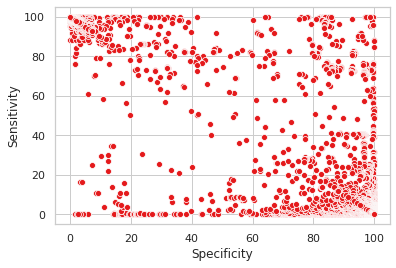

In [97]:
sns.scatterplot(x = 'Specificity', y = 'Sensitivity', data = data10)

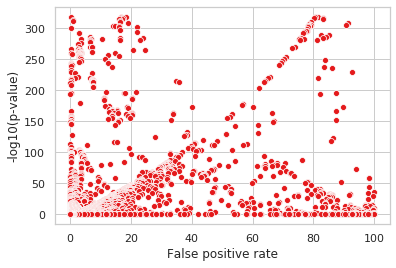

In [99]:
sns.scatterplot(x = 'False positive rate', y = '-log10(p-value)', data = data10)

# Entering cgmlst lineage scoary data (1468400426 vs others) 

In [100]:
# Enter the data

# Import in ST45 data

file5 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_newport/data/cgmlst_scoary_gwas.csv'
data11 = pd.read_csv(file5, header=0, na_values='Nothing')

In [101]:
data11.head()

Gene Non-unique Gene name            Annotation  \
0  group_14042                  NaN  hypothetical protein   
1  group_14048                  NaN  hypothetical protein   
2  group_14093                  NaN  hypothetical protein   
3  group_14096                  NaN  hypothetical protein   
4  group_14075                  NaN  hypothetical protein   

   Number_pos_present_in  Number_neg_present_in  Number_pos_not_present_in  \
0                    319                    179                          2   
1                    319                    179                          2   
2                    319                    179                          2   
3                    319                    179                          2   
4                    319                    180                          2   

   Number_neg_not_present_in  Sensitivity  Specificity   Odds_ratio  \
0                       1817    99.376947    91.032064  1619.058659   
1                       1817    99.376947    91.032064  1619.058659   
2                       1817    99.376947    91.032064  1619.058659   
3                       1817    99.376947    91.032064  1619.058659   
4                       1816    99.376947    90.981964  1609.177778   

         Naive_p   Bonferroni_p  Benjamini_H_p  Max_Pairwise_comparisons  \
0  6.837823e-258  1.901462e-253  4.753654e-254                         2   
1  6.837823e-258  1.901462e-253  4.753654e-254                         2   
2  6.837823e-258  1.901462e-253  4.753654e-254                         1   
3  6.837823e-258  1.901462e-253  4.753654e-254                         1   
4  1.893519e-257  5.265499e-253  4.786817e-254                         1   

   Max_supporting_pairs  Max_opposing_pairs  Best_pairwise_comp_p  \
0                     2                   1                   0.5   
1                     2                   1                   0.5   
2                     1                   1                   1.0   
3                     1                   1                   1.0   
4                     1                   1                   1.0   

   Worst_pairwise_comp_p  
0                    1.0  
1                    1.0  
2                    1.0  
3                    1.0  
4                    1.0

In [102]:
data11['False positive rate'] = 100 - data11['Specificity']
data11['-log10(p-value)'] = -1*(np.log10(data11['Bonferroni_p']))

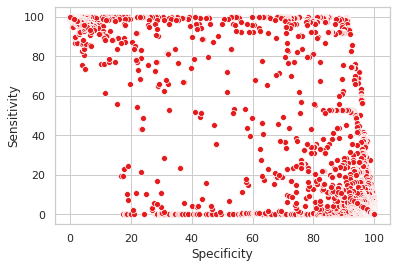

In [103]:
sns.scatterplot(x = 'Specificity', y = 'Sensitivity', data = data11)

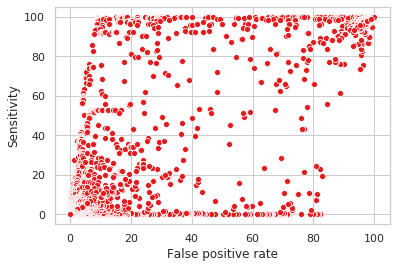

In [104]:
sns.scatterplot(x = 'False positive rate', y = 'Sensitivity', data = data11)

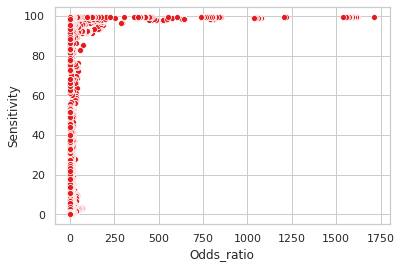

In [105]:
sns.scatterplot(x = 'Odds_ratio', y = 'Sensitivity', data = data11)

In [106]:
data10.columns

Index(['Gene', 'Non-unique Gene name', 'Annotation', 'Number_pos_present_in',
       'Number_neg_present_in', 'Number_pos_not_present_in',
       'Number_neg_not_present_in', 'Sensitivity', 'Specificity', 'Odds_ratio',
       'Naive_p', 'Bonferroni_p', 'Benjamini_H_p', 'Max_Pairwise_comparisons',
       'Max_supporting_pairs', 'Max_opposing_pairs', 'Best_pairwise_comp_p',
       'Worst_pairwise_comp_p', 'False positive rate', '-log10(p-value)'],
      dtype='object')

In [107]:
data11.columns

Index(['Gene', 'Non-unique Gene name', 'Annotation', 'Number_pos_present_in',
       'Number_neg_present_in', 'Number_pos_not_present_in',
       'Number_neg_not_present_in', 'Sensitivity', 'Specificity', 'Odds_ratio',
       'Naive_p', 'Bonferroni_p', 'Benjamini_H_p', 'Max_Pairwise_comparisons',
       'Max_supporting_pairs', 'Max_opposing_pairs', 'Best_pairwise_comp_p',
       'Worst_pairwise_comp_p', 'False positive rate', '-log10(p-value)'],
      dtype='object')

/home/joaocarlosgomesneto/miniconda3/lib/python3.7/site-packages/matplotlib/colors.py:973: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


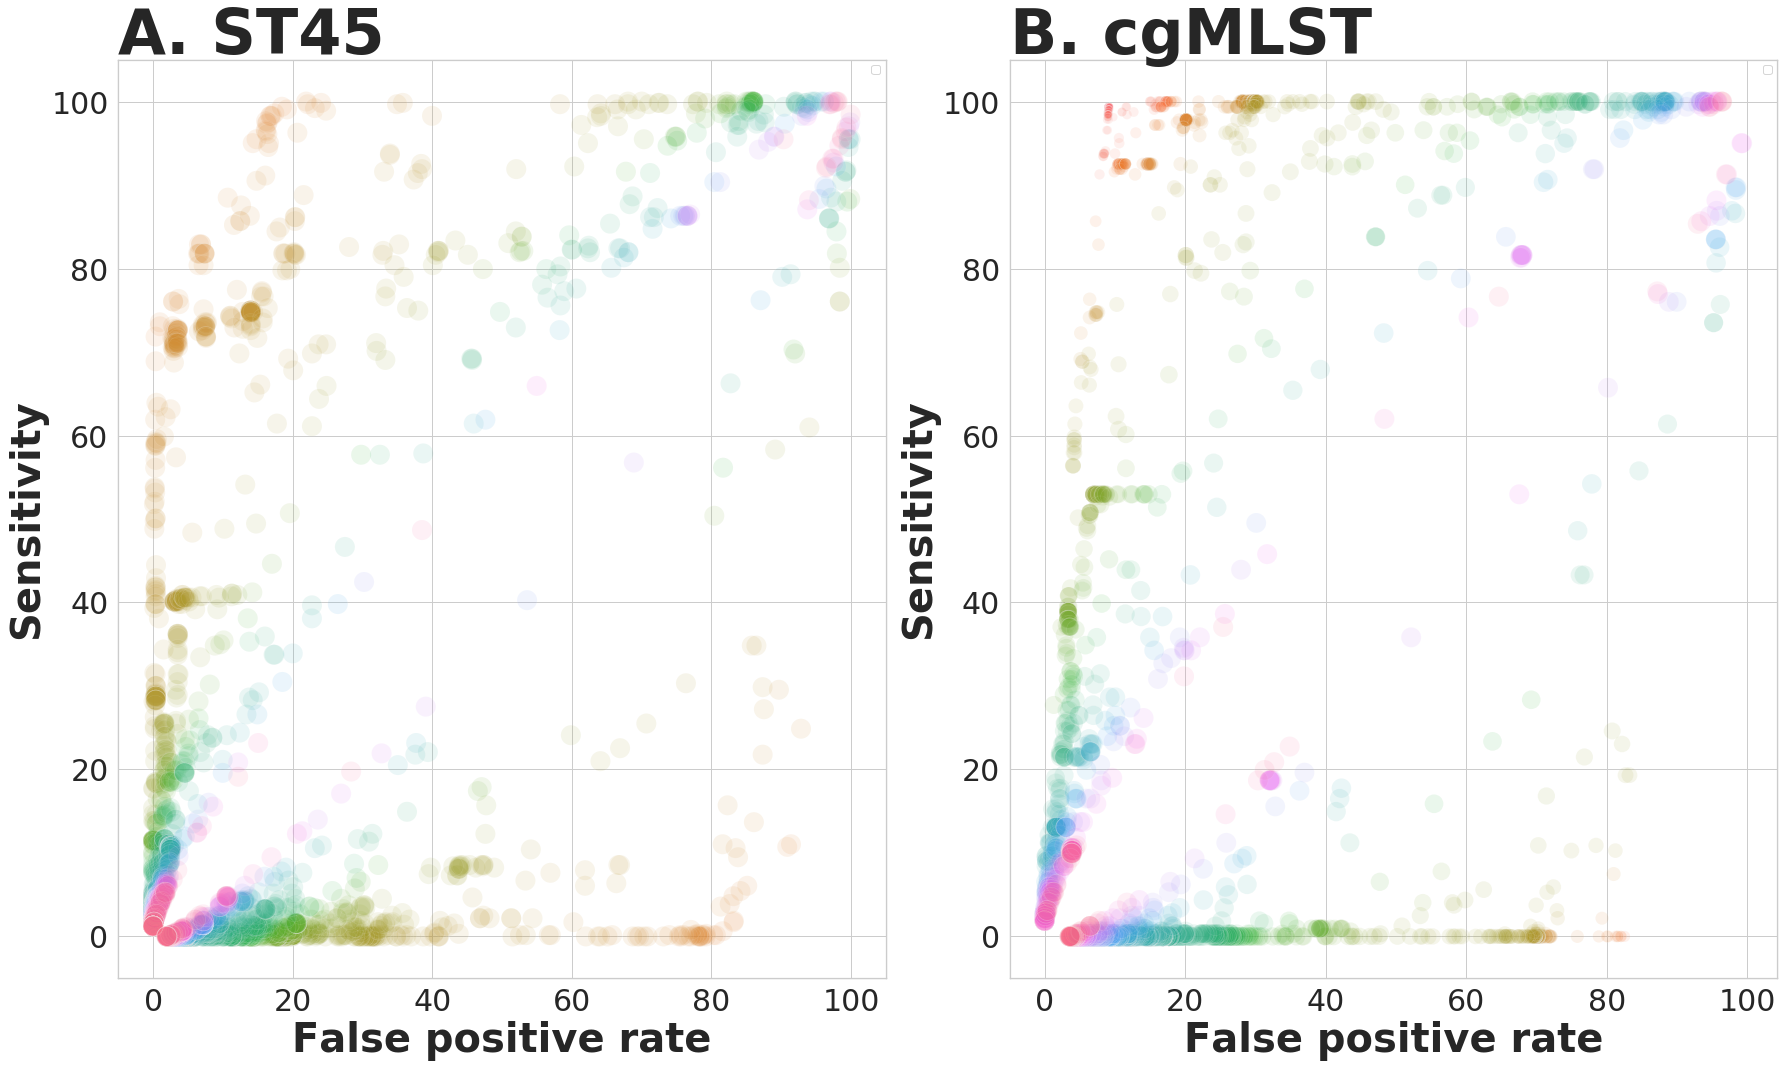

In [108]:
# Plotting pangenome analysis at the ST and core-genome MLST levels

_ = sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize = (25, 15))

# Remove default tick marks and labels 

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

#################################################################################################

# ST45 vs others pangenome analysis

ax1 = fig.add_subplot(1, 2, 1)
_ = sns.set(style = "whitegrid")
_ = sns.set_palette("Set1", 2)

value = (data10['Sensitivity'] > 95) & (data10['False positive rate'] < 10)
data10['classification']= np.where(value == True , 1, 0)
data10b = data10[data10['-log10(p-value)'] > 0]
_ = sns.scatterplot(x = "False positive rate", y = "Sensitivity", hue = "Gene", size = "-log10(p-value)", 
                alpha = .1, sizes = (400, 50), data=data10b, ax = ax1)
_ = plt.xlabel('False positive rate', fontsize = 40, weight = 'bold')
_ = plt.ylabel('Sensitivity', fontsize = 40, weight = 'bold')
_ = plt.xticks(fontsize = 30)
_ = plt.yticks(fontsize = 30)
_ = plt.title('A. ST45', fontsize = 62, weight = 'bold', loc = 'left')
_ = plt.legend([])
#_ = g1._legend.remove()

#################################################################################################

# cgmlst vs others pangenome analysis

ax2 = fig.add_subplot(1, 2, 2)
_ = sns.set(style = "whitegrid")
_ = sns.set_palette("Set1", 2)

value = (data11['Sensitivity'] > 95) & (data11['False positive rate'] < 10)
data11['classification']= np.where(value == True , 1, 0)
data11b = data11[data11['-log10(p-value)'] > 0]
_ = sns.scatterplot(x = "False positive rate", y = "Sensitivity", hue = "Gene", size = "-log10(p-value)", 
                alpha = .1, sizes = (400, 50), data=data11b, ax = ax2)
_ = plt.xlabel('False positive rate', fontsize = 40, weight = 'bold')
_ = plt.ylabel('Sensitivity', fontsize = 40, weight = 'bold')
_ = plt.xticks(fontsize = 30)
_ = plt.yticks(fontsize = 30)
_ = plt.title('B. cgMLST', fontsize = 62, weight = 'bold', loc = 'left')
_ = plt.legend([])
#ax2.annotate('Quaternary ammonium compound-resistance protein SugE', xy=(8.967, 98.130), xytext=(10, 80), fontsize = 20,
            #arrowprops=dict(facecolor='black', shrink=0.05))
#_ = g2._legend.remove()

_ = fig.tight_layout()
#_ = fig.clf()

#plt.savefig('supplementary_figure_4.png')

# Save the image in memory in PNG format
png1 = io.BytesIO()
fig.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
png2.save("supplementary_figure_4.tiff")
png1.close()

**Supplemental Fig 4.** **Pangenome-based classification analysis separating major vs other lineages at the ST and core-genome MLST levels.** A-B) Accurary based analysis to identifying genes, or predicted genes, separating between ST45 vs others, or core-genome MLST clone number 1468400426 vs the others, respectively. The y-axis and x-axis indicate the sensitivity and false postive rate, respectively. We color-code the circles based on the gene annotation, and their size is based on the -log10(p-value) which were calculated using the Bonferroni method provided within scoary. 

In [109]:
# list of genes (predictors) for ST45 classification

st = data10.loc[(data10['Sensitivity'] > 95) & (data10['False positive rate'] < 10)]
st[['Annotation']].values.tolist()

[['N-succinylarginine dihydrolase'],
 ['hypothetical protein'],
 ['Endoribonuclease SymE'],
 ['hypothetical protein'],
 ['CRISPR-associated endonuclease Cas1'],
 ['CRISPR-associated endonuclease/helicase Cas3'],
 ['tRNA-Gln(ttg)'],
 ['CRISPR system Cascade subunit CasC'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['CRISPR-associated endoribonuclease Cas2'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['F1 capsule-anchoring protein'],
 ['putative protein YfcO'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein']]

In [110]:
# list of genes (predictors) for cgmlst 1468400426 classification

cgmlst = data11.loc[(data11['Sensitivity'] > 95) & (data11['False positive rate'] < 10)]
cgmlst[['Annotation']].values.tolist()

[['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['DNA polymerase III PolC-type'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['Putative toxin HigB2'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['DNA-binding protein HU-beta'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['Nucleoid occlusion protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypothetical protein'],
 ['hypo

In [111]:
# total number of genes in the list

((data11['Sensitivity'] > 95) & (data11['False positive rate'] < 10)).sum()

92

In [112]:
# Read in the Rtab file 

file6 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_newport/data/cgmlst.Rtab'
data12 = pd.read_csv(file6, sep='\t')
data12.head()

Gene  SRR1002805  SRR1002816  SRR1002817  SRR1002827  SRR1002828  \
0  metK           1           1           1           1           1   
1  pykA           1           1           1           1           1   
2  plsY           1           1           1           1           1   
3  rpsI           1           1           1           1           1   
4  rapZ           1           1           1           1           1   

   SRR1002830  SRR1002837  SRR10084896  SRR1012296  SRR1012300  SRR1020278  \
0           1           1            1           1           1           1   
1           1           1            1           1           1           1   
2           1           1            1           1           1           1   
3           1           1            1           1           1           1   
4           1           1            1           1           1           1   

   SRR1021901  SRR1023115  SRR1023117  SRR1023120  SRR1030812  SRR1030844  \
0           1           1           1           1           1           1   
1           1           1           1           1           1           1   
2           1           1           1           1           1           1   
3           1           1           1           1           1           1   
4           1           1           1           1           1           1   

   SRR1030846  SRR1030849  SRR1030851  SRR1030852  SRR1030855  SRR1033455  \
0           1           1           1           1           1           1   
1           1           1           1           1           1           1   
2           1           1           1           1           1           1   
3           1           1           1           1           1           1   
4           1           1           1           1           1           1   

   SRR1033492  SRR1033494  SRR1033501  SRR1033510  SRR1033516  SRR1033522  \
0           1           1           1           1           1           1   
1           1           1           1           1           1           1   
2           1           1           1           1           1           1   
3           1           1           1           1           1           1   
4           1           1           1           1           1           1   

   SRR1033551  SRR1033553  SRR1033558  SRR1033569  SRR1033573  SRR1033580  \
0           1           1           1           1           1           1   
1           1           1           1           1           1           1   
2           1           1           1           1           1           1   
3           1           1           1           1           1           1   
4           1           1           1           1           1           1   

   SRR1036434  SRR1036435  SRR1036436  SRR1036441  SRR1036444  SRR1036449  \
0           1           1           1           1           1           1   
1           1           1           1           1           1           1   
2           1           1           1           1           1           1   
3           1           1           1           1           1           1   
4           1           1           1           1           1           1   

   SRR1041486  SRR1041884  SRR1041886  SRR1041889  SRR1041890  SRR1041891  \
0           1           1           1           1           1           1   
1           1           1           1           1           1           1   
2           1           1           1           1           1           1   
3           1           1           1           1           1           1   
4           1           1           1           1           1           1   

   SRR1041892  SRR1041893  SRR1041895  SRR1041896  SRR1041897  SRR1043926  \
0           1           1           1           1           1           1   
1           1           1           1           1           1           1   
2           1           1           1           1           1           1   
3           1        

In [113]:
# Transpose the dataframe

data13 = data12.transpose()
data13.head()

0     1     2     3     4     5     6     7     8     9     10     \
Gene        metK  pykA  plsY  rpsI  rapZ  diaA  rpsU  speB  csrA  rplT  rpmI   
SRR1002805     1     1     1     1     1     1     1     1     1     1     1   
SRR1002816     1     1     1     1     1     1     1     1     1     1     1   
SRR1002817     1     1     1     1     1     1     1     1     1     1     1   
SRR1002827     1     1     1     1     1     1     1     1     1     1     1   

           11    12    13    14    15    16    17    18    19    20    21     \
Gene        rpoZ   rph   crp  rpsL  rpsJ  rplD  rplW  rplB  rpsS  rpsC  rplN   
SRR1002805     1     1     1     1     1     1     1     1     1     1     1   
SRR1002816     1     1     1     1     1     1     1     1     1     1     1   
SRR1002817     1     1     1     1     1     1     1     1     1     1     1   
SRR1002827     1     1     1     1     1     1     1     1     1     1     1   

           22    23    24    25    26    27    28    29    30    31    32     \
Gene        rplX  rplE  rplR  rpsE  rpmD  rplO  secY  trkA   gpt   tgt  yajC   
SRR1002805     1     1     1     1     1     1     1     1     1     1     1   
SRR1002816     1     1     1     1     1     1     1     1     1     1     1   
SRR1002817     1     1     1     1     1     1     1     1     1     1     1   
SRR1002827     1     1     1     1     1     1     1     1     1     1     1   

           33     34    35      36    37    38    39    40    41    42     \
Gene        clpP  lon_1  dksA  ftsA_1  mraY  glnB  ptsI  ptsH  rpsR  nuoI   
SRR1002805     1      1     1       1     1     1     1     1     1     1   
SRR1002816     1      1     1       1     1     1     1     1     1     1   
SRR1002817     1      1     1       1     1     1     1     1     1     1   
SRR1002827     1      1     1       1     1     1     1     1     1     1   

           43    44      45           46    47    48    49    50    51     \
Gene        nuoK  rlmH  ahpC_2  group_13699  trxA  atpE  atpD  sucC  dapD   
SRR1002805     1     1       1            1     1     1     1     1     1   
SRR1002816     1     1       1            1     1     1     1     1     1   
SRR1002817     1     1       1            1     1     1     1     1     1   
SRR1002827     1     1       1            1     1     1     1     1     1   

           52    53    54    55    56    57    58    59    60      61     \
Gene        pyrH  manY   fis  sthA  rpoB  rplJ  rplK   prs  rpoE  fruA_1   
SRR1002805     1     1     1     1     1     1     1     1     1       1   
SRR1002816     1     1     1     1     1     1     1     1     1       1   
SRR1002817     1     1     1     1     1     1     1     1     1       1   
SRR1002827     1     1     1     1     1     1     1     1     1       1   

           62    63    64    65    66    67      68      69    70      71     \
Gene        ybaB  nuoB  rplQ  accD  rsmJ  gpmA  glnQ_2  ilvD_2  mreB  cysH_1   
SRR1002805     1     1     1     1     1     1       1       1     1       1   
SRR1002816     1     1     1     1     1     1       1       1     1       1   
SRR1002817     1     1     1     1     1     1       1       1     1       1   
SRR1002827     1     1     1     1     1     1       1       1     1       1   

           72    73    74    75    76    77    78    79    80    81    82     \
Gene        mtlD  nasD  guaB  thiC  rbfA  cysI  lldP   amn  yejB   hpt  lolC   
SRR1002805     1     1     1     1     1     1     1     1     1     1     1   
SRR1002816     1     1     1     1     1     1     1     1     1     1     1   
SRR1002817     1     1     1     1     1     1     1     1     1     1     1   
SRR1002827     1     1     1     1     1     1     1     1     1     1     1   

                 83    84    85     86          87    88           89     \
Gene        group_4163  betB  pqiB  glyA1  group_4179  nrdA  group_42184   
SRR1002805           1     1     1      1           1     1            

In [114]:
# Shape of the data

print(data13.shape)

# Missing values

print(data13.isnull().sum())

(2318, 42436)
0        0
1        0
2        0
3        0
4        0
        ..
42431    0
42432    0
42433    0
42434    0
42435    0
Length: 42436, dtype: int64


In [115]:
# index data13

data13.index

Index(['Gene', 'SRR1002805', 'SRR1002816', 'SRR1002817', 'SRR1002827',
       'SRR1002828', 'SRR1002830', 'SRR1002837', 'SRR10084896', 'SRR1012296',
       ...
       'SRR952675', 'SRR952676', 'SRR952677', 'SRR952682', 'SRR952683',
       'SRR953548', 'SRR953551', 'SRR980337', 'SRR980338', 'SRR980354'],
      dtype='object', length=2318)

In [116]:
# Transfor to csv

data13.to_csv('/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_newport/data/data13.csv', header=False, index=True)

In [117]:
# Read in data13 

file7 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_newport/data/data13.csv'
data14 = pd.read_csv(file7, header = 0)
data14.head()

Gene  metK  pykA  plsY  rpsI  rapZ  diaA  rpsU  speB  csrA  rplT  \
0  SRR1002805     1     1     1     1     1     1     1     1     1     1   
1  SRR1002816     1     1     1     1     1     1     1     1     1     1   
2  SRR1002817     1     1     1     1     1     1     1     1     1     1   
3  SRR1002827     1     1     1     1     1     1     1     1     1     1   
4  SRR1002828     1     1     1     1     1     1     1     1     1     1   

   rpmI  rpoZ  rph  crp  rpsL  rpsJ  rplD  rplW  rplB  rpsS  rpsC  rplN  rplX  \
0     1     1    1    1     1     1     1     1     1     1     1     1     1   
1     1     1    1    1     1     1     1     1     1     1     1     1     1   
2     1     1    1    1     1     1     1     1     1     1     1     1     1   
3     1     1    1    1     1     1     1     1     1     1     1     1     1   
4     1     1    1    1     1     1     1     1     1     1     1     1     1   

   rplE  rplR  rpsE  rpmD  rplO  secY  trkA  gpt  tgt  yajC  clpP  lon_1  \
0     1     1     1     1     1     1     1    1    1     1     1      1   
1     1     1     1     1     1     1     1    1    1     1     1      1   
2     1     1     1     1     1     1     1    1    1     1     1      1   
3     1     1     1     1     1     1     1    1    1     1     1      1   
4     1     1     1     1     1     1     1    1    1     1     1      1   

   dksA  ftsA_1  mraY  glnB  ptsI  ptsH  rpsR  nuoI  nuoK  rlmH  ahpC_2  \
0     1       1     1     1     1     1     1     1     1     1       1   
1     1       1     1     1     1     1     1     1     1     1       1   
2     1       1     1     1     1     1     1     1     1     1       1   
3     1       1     1     1     1     1     1     1     1     1       1   
4     1       1     1     1     1     1     1     1     1     1       1   

   group_13699  trxA  atpE  atpD  sucC  dapD  pyrH  manY  fis  sthA  rpoB  \
0            1     1     1     1     1     1     1     1    1     1     1   
1            1     1     1     1     1     1     1     1    1     1     1   
2            1     1     1     1     1     1     1     1    1     1     1   
3            1     1     1     1     1     1     1     1    1     1     1   
4            1     1     1     1     1     1     1     1    1     1     1   

   rplJ  rplK  prs  rpoE  fruA_1  ybaB  nuoB  rplQ  accD  rsmJ  gpmA  glnQ_2  \
0     1     1    1     1       1     1     1     1     1     1     1       1   
1     1     1    1     1       1     1     1     1     1     1     1       1   
2     1     1    1     1       1     1     1     1     1     1     1       1   
3     1     1    1     1       1     1     1     1     1     1     1       1   
4     1     1    1     1       1     1     1     1     1     1     1       1   

   ilvD_2  mreB  cysH_1  mtlD  nasD  guaB  thiC  rbfA  cysI  lldP  amn  yejB  \
0       1     1       1     1     1     1     1     1     1     1    1     1   
1       1     1       1     1     1     1     1     1     1     1    1     1   
2       1     1       1     1     1     1     1     1     1     1    1     1   
3       1     1       1     1     1     1     1     1     1     1    1     1   
4       1     1       1     1     1     1     1     1     1     1    1     1   

   hpt  lolC  group_4163  betB  pqiB  glyA1  group_4179  nrdA  group_42184  \
0    1     1           1     1     1      1           1     1            1   
1    1     1           1     1     1      1           1     1            1   
2    1     1           1     1     1      1           1     1            1   
3    1     1           1     1     1      1           1     1            1   
4    1     1           1     1     1      1           1     1            1   

   lrp_1  rpsA  infA  ahpF  deoA  glpX  rbsA  mnmG  mlaE  nlpI  yhbU  ygiC  \
0      1     1     1     1     1     1     1     1     1     1     1     1   
1      1     1     1     1     1     1     1     1     1     1     1     1   
2      1     1     1   

In [118]:
# Change gene column name

data14 = data14.rename(columns = {'Gene' : 'id'})
data14.head()

id  metK  pykA  plsY  rpsI  rapZ  diaA  rpsU  speB  csrA  rplT  \
0  SRR1002805     1     1     1     1     1     1     1     1     1     1   
1  SRR1002816     1     1     1     1     1     1     1     1     1     1   
2  SRR1002817     1     1     1     1     1     1     1     1     1     1   
3  SRR1002827     1     1     1     1     1     1     1     1     1     1   
4  SRR1002828     1     1     1     1     1     1     1     1     1     1   

   rpmI  rpoZ  rph  crp  rpsL  rpsJ  rplD  rplW  rplB  rpsS  rpsC  rplN  rplX  \
0     1     1    1    1     1     1     1     1     1     1     1     1     1   
1     1     1    1    1     1     1     1     1     1     1     1     1     1   
2     1     1    1    1     1     1     1     1     1     1     1     1     1   
3     1     1    1    1     1     1     1     1     1     1     1     1     1   
4     1     1    1    1     1     1     1     1     1     1     1     1     1   

   rplE  rplR  rpsE  rpmD  rplO  secY  trkA  gpt  tgt  yajC  clpP  lon_1  \
0     1     1     1     1     1     1     1    1    1     1     1      1   
1     1     1     1     1     1     1     1    1    1     1     1      1   
2     1     1     1     1     1     1     1    1    1     1     1      1   
3     1     1     1     1     1     1     1    1    1     1     1      1   
4     1     1     1     1     1     1     1    1    1     1     1      1   

   dksA  ftsA_1  mraY  glnB  ptsI  ptsH  rpsR  nuoI  nuoK  rlmH  ahpC_2  \
0     1       1     1     1     1     1     1     1     1     1       1   
1     1       1     1     1     1     1     1     1     1     1       1   
2     1       1     1     1     1     1     1     1     1     1       1   
3     1       1     1     1     1     1     1     1     1     1       1   
4     1       1     1     1     1     1     1     1     1     1       1   

   group_13699  trxA  atpE  atpD  sucC  dapD  pyrH  manY  fis  sthA  rpoB  \
0            1     1     1     1     1     1     1     1    1     1     1   
1            1     1     1     1     1     1     1     1    1     1     1   
2            1     1     1     1     1     1     1     1    1     1     1   
3            1     1     1     1     1     1     1     1    1     1     1   
4            1     1     1     1     1     1     1     1    1     1     1   

   rplJ  rplK  prs  rpoE  fruA_1  ybaB  nuoB  rplQ  accD  rsmJ  gpmA  glnQ_2  \
0     1     1    1     1       1     1     1     1     1     1     1       1   
1     1     1    1     1       1     1     1     1     1     1     1       1   
2     1     1    1     1       1     1     1     1     1     1     1       1   
3     1     1    1     1       1     1     1     1     1     1     1       1   
4     1     1    1     1       1     1     1     1     1     1     1       1   

   ilvD_2  mreB  cysH_1  mtlD  nasD  guaB  thiC  rbfA  cysI  lldP  amn  yejB  \
0       1     1       1     1     1     1     1     1     1     1    1     1   
1       1     1       1     1     1     1     1     1     1     1    1     1   
2       1     1       1     1     1     1     1     1     1     1    1     1   
3       1     1       1     1     1     1     1     1     1     1    1     1   
4       1     1       1     1     1     1     1     1     1     1    1     1   

   hpt  lolC  group_4163  betB  pqiB  glyA1  group_4179  nrdA  group_42184  \
0    1     1           1     1     1      1           1     1            1   
1    1     1           1     1     1      1           1     1            1   
2    1     1           1     1     1      1           1     1            1   
3    1     1           1     1     1      1           1     1            1   
4    1     1           1     1     1      1           1     1            1   

   lrp_1  rpsA  infA  ahpF  deoA  glpX  rbsA  mnmG  mlaE  nlpI  yhbU  ygiC  \
0      1     1     1     1     1     1     1     1     1     1     1     1   
1      1     1     1     1     1     1     1     1     1     1     1     1   
2      1     1     1     

In [119]:
# data15 

data15 = data9.rename(columns = {'BAPS 1' : 'baps1', 'ST' : 'st', 'Core-genome MLST' : 'lineage'})
data15 = data15.reset_index()
data15.head()

id  baps1     st  lineage
0  SRR1002805      8  118.0        0
1  SRR1002816      8  118.0        0
2  SRR1002817      1   45.0        1
3  SRR1002827      1   45.0        1
4  SRR1002828      1   45.0        1

In [120]:
# Merge datasets

data16 = pd.merge(data14, data15, on = 'id')

In [121]:
# check the data

data16.shape

(2317, 42440)

In [122]:
# first observations

data16.head()

id  metK  pykA  plsY  rpsI  rapZ  diaA  rpsU  speB  csrA  rplT  \
0  SRR1002805     1     1     1     1     1     1     1     1     1     1   
1  SRR1002816     1     1     1     1     1     1     1     1     1     1   
2  SRR1002817     1     1     1     1     1     1     1     1     1     1   
3  SRR1002827     1     1     1     1     1     1     1     1     1     1   
4  SRR1002828     1     1     1     1     1     1     1     1     1     1   

   rpmI  rpoZ  rph  crp  rpsL  rpsJ  rplD  rplW  rplB  rpsS  rpsC  rplN  rplX  \
0     1     1    1    1     1     1     1     1     1     1     1     1     1   
1     1     1    1    1     1     1     1     1     1     1     1     1     1   
2     1     1    1    1     1     1     1     1     1     1     1     1     1   
3     1     1    1    1     1     1     1     1     1     1     1     1     1   
4     1     1    1    1     1     1     1     1     1     1     1     1     1   

   rplE  rplR  rpsE  rpmD  rplO  secY  trkA  gpt  tgt  yajC  clpP  lon_1  \
0     1     1     1     1     1     1     1    1    1     1     1      1   
1     1     1     1     1     1     1     1    1    1     1     1      1   
2     1     1     1     1     1     1     1    1    1     1     1      1   
3     1     1     1     1     1     1     1    1    1     1     1      1   
4     1     1     1     1     1     1     1    1    1     1     1      1   

   dksA  ftsA_1  mraY  glnB  ptsI  ptsH  rpsR  nuoI  nuoK  rlmH  ahpC_2  \
0     1       1     1     1     1     1     1     1     1     1       1   
1     1       1     1     1     1     1     1     1     1     1       1   
2     1       1     1     1     1     1     1     1     1     1       1   
3     1       1     1     1     1     1     1     1     1     1       1   
4     1       1     1     1     1     1     1     1     1     1       1   

   group_13699  trxA  atpE  atpD  sucC  dapD  pyrH  manY  fis  sthA  rpoB  \
0            1     1     1     1     1     1     1     1    1     1     1   
1            1     1     1     1     1     1     1     1    1     1     1   
2            1     1     1     1     1     1     1     1    1     1     1   
3            1     1     1     1     1     1     1     1    1     1     1   
4            1     1     1     1     1     1     1     1    1     1     1   

   rplJ  rplK  prs  rpoE  fruA_1  ybaB  nuoB  rplQ  accD  rsmJ  gpmA  glnQ_2  \
0     1     1    1     1       1     1     1     1     1     1     1       1   
1     1     1    1     1       1     1     1     1     1     1     1       1   
2     1     1    1     1       1     1     1     1     1     1     1       1   
3     1     1    1     1       1     1     1     1     1     1     1       1   
4     1     1    1     1       1     1     1     1     1     1     1       1   

   ilvD_2  mreB  cysH_1  mtlD  nasD  guaB  thiC  rbfA  cysI  lldP  amn  yejB  \
0       1     1       1     1     1     1     1     1     1     1    1     1   
1       1     1       1     1     1     1     1     1     1     1    1     1   
2       1     1       1     1     1     1     1     1     1     1    1     1   
3       1     1       1     1     1     1     1     1     1     1    1     1   
4       1     1       1     1     1     1     1     1     1     1    1     1   

   hpt  lolC  group_4163  betB  pqiB  glyA1  group_4179  nrdA  group_42184  \
0    1     1           1     1     1      1           1     1            1   
1    1     1           1     1     1      1           1     1            1   
2    1     1           1     1     1      1           1     1            1   
3    1     1           1     1     1      1           1     1            1   
4    1     1           1     1     1      1           1     1            1   

   lrp_1  rpsA  infA  ahpF  deoA  glpX  rbsA  mnmG  mlaE  nlpI  yhbU  ygiC  \
0      1     1     1     1     1     1     1     1     1     1     1     1   
1      1     1     1     1     1     1     1     1     1     1     1     1   
2      1     1     1     

# Random forest model for cgmlst lineage

In [123]:
# Reset index
data17 = data16.set_index('id')

# Get the labels
y1 = data17['lineage']

# Get the features

X1 = data17.drop(['baps1', 'st', 'lineage'], axis = 1)

In [124]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 1, stratify = y1) # 70% training and 30% test

In [125]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100, random_state = 1)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train,y_train)

y_pred1=clf.predict(X_test)

In [126]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9396551724137931


In [127]:
feature_imp = pd.Series(clf.feature_importances_,index=X1.columns).sort_values(ascending=False)
feature_imp

group_7476     0.013406
group_13949    0.011731
group_14127    0.011336
group_9823     0.009660
group_14057    0.009507
                 ...   
group_26261    0.000000
group_26260    0.000000
group_26259    0.000000
group_26258    0.000000
metK           0.000000
Length: 42436, dtype: float64

In [128]:
subset = feature_imp[feature_imp > 0.001]

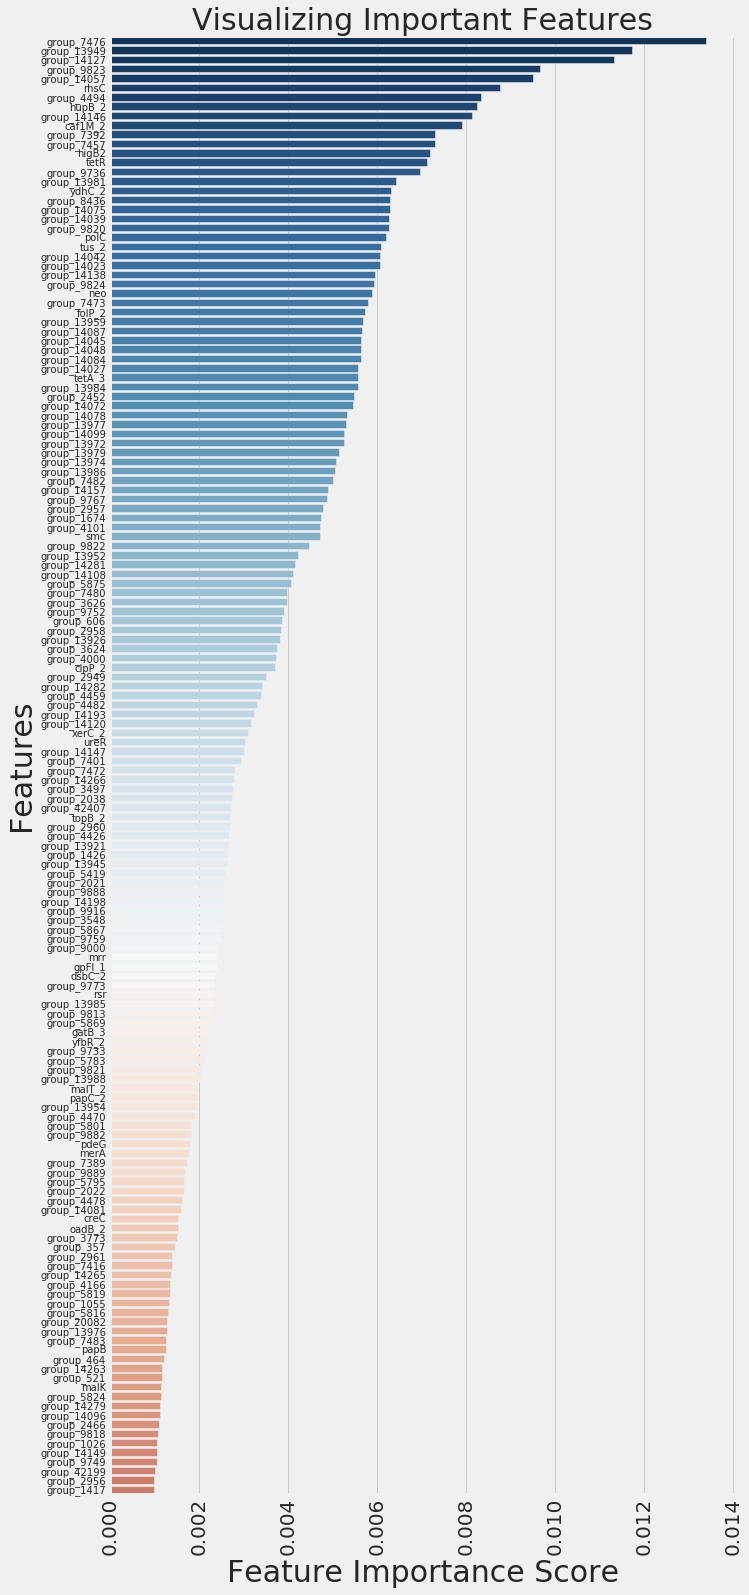

In [129]:
# Creating a bar plot
_ = plt.style.use("fivethirtyeight")
_ = sns.set_palette('RdBu_r', 200)
fig, ax = plt.subplots(1, 1, figsize = (10, 25))
sns.barplot(x=subset, y=subset.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize = 30)
plt.ylabel('Features', fontsize = 30)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 10)
plt.title("Visualizing Important Features", fontsize = 30)
#plt.savefig('supplementary_figure_5.png')

# Save the image in memory in PNG format
png1 = io.BytesIO()
fig.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
png2.save("supplementary_figure_5.tiff")
png1.close()

**Supplemental Fig 5.** **Random forest classification analysis separating major vs other clones at the core-genome MLST level using the entire pangenome.** Random forest output depicting the most important predictors and their respective feature importance score, when using the pangeome for a supervised classification into either  core-genome MLST clone number 1468400426 vs the others. The higher the value of the feature importance score, the more relevant the gene or predicted gene is.